# Фукнции как объекты первого класса

In [ ]:
def to_upper(text):
	return text.upper()

print(to_upper('Hello'))

to_up = to_upper

print (to_up('Hello'))

В функции можно передавать функции

In [ ]:
def shout(text):
    return text.upper()


def whisper(text):
    return text.lower()


def greet(func):
    greeting = func(
        'Hi, I am created by a function passed as an argument.'
    )
    print (greeting)

greet(shout)
greet(whisper)

HI, I AM CREATED BY A FUNCTION PASSED AS AN ARGUMENT.
hi, i am created by a function passed as an argument.


Из функций можно возвращать функции

In [ ]:
def create_adder(x):
    def adder(y):
        return x + y

    return adder

add_15 = create_adder(15)

print (add_15(10))

# print(adder(10)) # Ошибка
# print(create_adder.adder(10)) # Ошибка
print(create_adder(15)(10))

25


AttributeError: ignored

Если очень надо

In [ ]:
import types


def outer(x):
    def inner():
        print('Inner function')

    return inner


types.FunctionType(outer.__code__.co_consts[1], globals())()

Inner function


Это называется вложенные фукнции

In [ ]:
def outer_func(text):
	def inner_func():
		print(text)

	inner_func()

if __name__ == '__main__':
	outer_func('Hey!')

Hey!


# Замыкания

In [ ]:
def closure(text):
    def inner_func():
        print(text)

    return inner_func

if __name__ == '__main__':
    my_func = closure('Hey!')
    my_func() # inner_func нет в области видимости, но мы ей пользуемся, т.к.
              # есть копия ссылки в outer_func

Hey!


In [ ]:
%%python

import logging
logging.basicConfig(filename='app.log', level=logging.INFO)


def logger(func):
    def log_func(*args):
        logging.info(
            f'Running "{func.__name__}" with arguments {args}'
        )
        print(func(*args))

    return log_func


def add(x, y):
    return x + y


def sub(x, y):
    return x - y

add_logger = logger(add)
sub_logger = logger(sub)

add_logger(3, 3)
add_logger(4, 5)

sub_logger(10, 5)
sub_logger(20, 10)

6
9
5
10


In [ ]:
from pathlib import Path
print(Path('app.log').read_text())

INFO:root:Running "add" with arguments (3, 3)
INFO:root:Running "add" with arguments (4, 5)
INFO:root:Running "sub" with arguments (10, 5)
INFO:root:Running "sub" with arguments (20, 10)



# Декораторы

In [ ]:
def hello_decorator(func):
    def wrapper():
        print('Hello, this is before function execution')
        func()
        print('This is after function execution')

    return wrapper

def function_to_be_used():
    print('This is inside the function!')

function_to_be_used = hello_decorator(function_to_be_used)

function_to_be_used()

In [ ]:
import time
import math


def calculate_time(func):
    def wrapper(*args, **kwargs):

        begin = time.time()
        func(*args, **kwargs)
        end = time.time()

        print(f'Total time taken in {func.__name__}: {end - begin}')

    return wrapper


@calculate_time
def factorial(num):
    time.sleep(2)
    print(math.factorial(num))

factorial(100)

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000
Total time taken in factorial: 2.0034375190734863


Еще пример:

In [ ]:
def param_decorator(func):
    def wrapper(*args, **kwargs):

        print('Before execution')
        returned_value = func(*args, **kwargs)
        print('After execution')

        return returned_value

    return wrapper


@param_decorator
def sum_two_numbers(a, b):
    print('Inside the function')
    return a + b

a, b = 1, 2

print(f'Sum = {sum_two_numbers(a, b)}')

## Декораторы с параметрами

Еще раз для понимания
```python
@some_decorator
def some_method():
    pass
```
Эквивалентно:
```python
some_method = some_decorator(some_method)
```
В то время как:
```python
@some_decorator()
def some_method():
    pass
```
Эквивалентно:
```python
some_method = some_decorator()(some_method)
```

In [ ]:
def dec(operator=')'):
    def features(fn):
        def add_some_decorations(a, b):
            res = fn(a, b)
            print(f'Function: {fn.__name__}({a}, {b})')
            print('Operator: ', operator)
            print(f'{fn.__doc__}: {a} and {b}')
            expr = f'{a}{operator}{b}'
            eval(expr)
            print(f'Return: {a} {operator} {b}')
            print(f'Output: {res}')
            return res
        return add_some_decorations
    return features


# Ошибка!!!
# @dec(operator='+')
# def add(a, b, c):
#     """Addition of 2 arguments"""
#     return a + b + c


@dec()
def add(a, b):
    """Addition of 2 arguments"""
    return a + b


# @dec(operator='+')
# def add(a, b):
#     """Addition of 2 arguments"""
#     return a + b


@dec(operator='-')
def sub(a, b):
    """Subtraction of 2 arguments"""
    return a - b


print(add(5, 2))
print(sub(1, 4))

Function: add(5, 2)
Operator:  )
Addition of 2 arguments: 5 and 2


SyntaxError: ignored

In [ ]:
from functools import wraps


def repeat(times):
    """ call a function a number of times """
    def decorate(fn):
        @wraps(fn)
        def wrapper(*args, **kwargs):
            for _ in range(times):
                result = fn(*args, **kwargs)
            return result
        return wrapper
    return decorate


@repeat(10)
def say(message):
    print(message)


say('Hello')

Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello


Без использования фабрики декораторов `@wraps` имя функции `example` будет заменено на  `wrapper`, а строка документации декорируемой функции `example` была бы потеряна.

In [ ]:
from functools import wraps


def my_decorator(f):
    """my doc"""
    @wraps(f)
    def wrapper(*args, **kwds):
        print('Calling decorated function')
        return f(*args, **kwds)
    return wrapper


@my_decorator
def example():
    """Docstring"""
    print('Called example function')


example()
example.__name__
example.__doc__

Calling decorated function
Called example function


'Docstring'

## Цепочка декораторов

In [ ]:
def decor1(func):
	def wrapper():
		x = func()
		return x * x
	return wrapper


def decor(func):
	def wrapper():
		x = func()
		return 2 * x
	return wrapper

@decor1
@decor
def num():
	return 10

@decor
@decor1
def num2():
	return 10

print(num())
print(num2())

400
200


Пример: хранение промежуточных результатов (простейшее кэширование)

In [ ]:
def my_factorial(num):
    if num == 1:
        return 1
    else:
        return num * my_factorial(num - 1)


print(my_factorial(5))
print(my_factorial(5))

120
120


In [ ]:
memory = {}
def memoize_factorial(f):
    def wrapper(num):
        if num not in memory:
            memory[num] = f(num)
            print('result saved in memory')
        else:
            print('returning result from saved memory')
        print(f'number {num}, memory contains {memory}')
        return memory[num]

    return wrapper


@memoize_factorial
def facto(num):
    if num == 1:
        return 1
    else:
        return num * facto(num - 1)

print(facto(5))
print(facto(5))

result saved in memory
number 1, memory contains {1: 1}
result saved in memory
number 2, memory contains {1: 1, 2: 2}
result saved in memory
number 3, memory contains {1: 1, 2: 2, 3: 6}
result saved in memory
number 4, memory contains {1: 1, 2: 2, 3: 6, 4: 24}
result saved in memory
number 5, memory contains {1: 1, 2: 2, 3: 6, 4: 24, 5: 120}
120
returning result from saved memory
number 5, memory contains {1: 1, 2: 2, 3: 6, 4: 24, 5: 120}
120


# Введение в объектно-ориентированное программирование



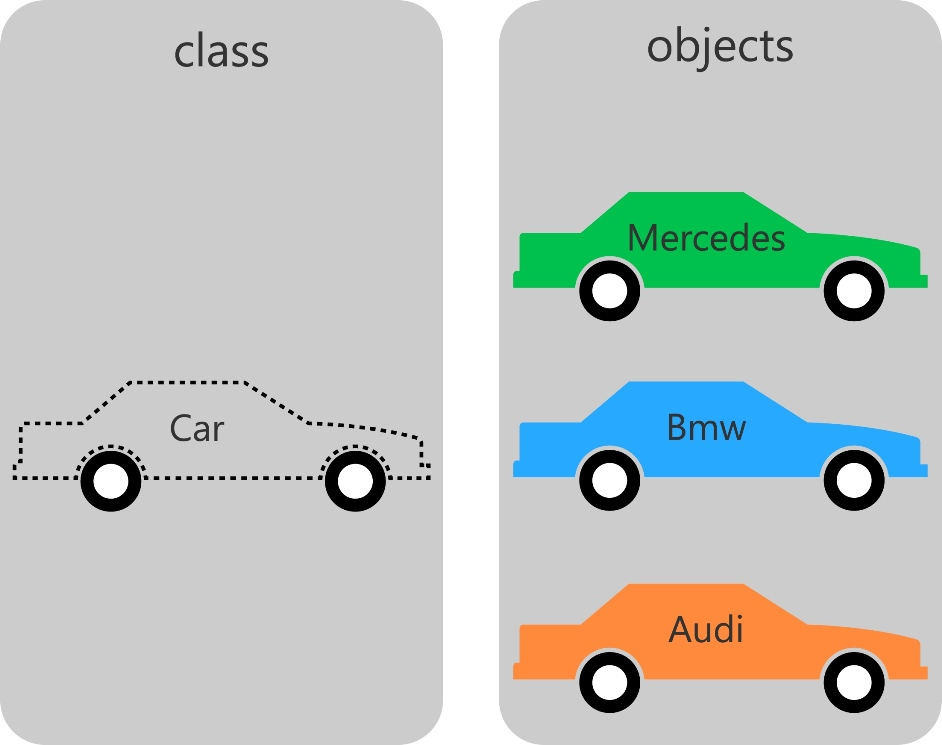

## Создание класса

In [ ]:
class Point2D:
    """Точка на плоскости."""
    # pass
    ...


if __name__ == '__main__':
    # Создание объекта (экземпляра класса).
    p = Point2D()

    print(p)
    print(type(p))

<class '__main__.Point2D'>


In [ ]:
import math


class Point2D:
    """Точка на плоскости."""

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def get_distance(self):
        """Вернуть расстояние до начала координат."""
        # return (self.x**2 + self.y**2) ** 0.5
        return math.hypot(self.x, self.y)


if __name__ == '__main__':
    p = Point2D(3, 4)

    print(p)
    print(p.x, p.y)

    print(f'Расстояние до начала координат: {p.get_distance():.2f}')

## Строковое представление классов

In [ ]:
class Point2D:
    """Точка на плоскости."""

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        """Вернуть строку в виде 'Точка 2D (x, y)'."""
        return f'Точка 2D ({self.x}, {self.y})'

    def __repr__(self) -> str:
        return 'Meow'

    def get_distance(self):
        """Вернуть расстояние до начала координат."""
        # return (self.x**2 + self.y**2) ** 0.5
        return math.hypot(self.x, self.y)

p = Point2D(3, 4)
print(p)

# if __name__ == '__main__':

#     # print(p)

#     p

Точка 2D (3, 4)


## Перегрузка операторов

In [ ]:
class Point2D:
    """Точка на плоскости."""

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        """Вернуть строку в виде 'Точка 2D (x, y)'."""
        return f'Точка 2D ({self.x}, {self.y})'

    def __add__(self, other):
        """Создать новый объект как сумму координат 'self' и 'other'."""

        # return Point2D(self.x + other.x, self.y + other.y)
        return self.__class__(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        """Создать новый объект как разность координат 'self' и 'other'."""
        return self.__class__(self.x - other.x, self.y - other.y)

    def __neg__(self):
        """Вернуть новый объект, инвертировав координаты."""
        return self.__class__(-self.x, -self.y)

    def __eq__(self, other):
        """Вернуть ответ, являются ли точки одинаковыми."""
        return self.x == other.x and self.y == other.y

    def __ne__(self, other):
        """Вернуть ответ, являются ли точки разными.
        Используем реализованную операцию ==.
        """
        return not (self == other)

    def get_distance(self):
        """Вернуть расстояние до начала координат."""
        # return (self.x**2 + self.y**2) ** 0.5
        return math.hypot(self.x, self.y)

if __name__ == '__main__':

    p1 = Point2D(0, 5)
    p2 = Point2D(-5, 10)

    print(p1 + p2)
    print(p1 - p2)
    print(-p2)
    print(p1 == p2, p1 != p2)

Точка 2D (-5, 15)
Точка 2D (5, -5)
Точка 2D (5, -10)
False True


| Операция                        | Синтаксис                 | Функция                               |
|---------------------------------|---------------------------|---------------------------------------|
|                                 | **Арифметические**            |                                       |
| Отрицание                       | -a                        | `__neg__`(a)                            |
| “Не” отрицание                  | +a                        | `__pos__`(a)                            |
| Сложение                        | a + b                     | `__add__(a, b)`                         |
| Вычитание                       | a - b                     | `__sub__(a, b)`                         |
| Умножение                       | a * b                     | `__mul__(a, b)`                         |
| Деление                         | a / b                     | `__truediv__(a, b)`                     |
| Целочисленное деление           | a // b                    | `__floordiv__(a, b)`                    |
| Остаток от деления              | a % b                     | `__mod__(a, b)`                         |
| Возведение в степень            | a ** b                    | `__pow__(a, b)`                         |
|                                 | **Индексация и срезы**        |                                       |
| Доступ по индексу               | obj[k]                    | `__getitem__(obj, k)`                   |
| Присвоение по индексу           | obj[k] = v                | `__setitem__(obj, k, v)`                |
| Удаление по индексу             | del obj[k]                | `__delitem__(obj, k)`                   |
| Срез                            | seq[i:j]                  | `__getitem__(seq, slice(i, j))`         |
| Присвоение срезу                | seq[i:j] = values         | `__setitem__(seq, slice(i, j), values)` |
| Удаление среза                  | del seq[i:j]              | `__delitem__(seq, slice(i, j))`         |
| Конкатенация                    | seq1 + seq2               | `__concat__(seq1, seq2)`                |
|                                 | **Идентификация и сравнение**|                                       |
| Идентификация                   | a is b                    | `__is__(a, b)`                          |
|                                 | a is not b                | `__is_not__(a, b)`                      |
| Проверка на вхождение           | obj in seq                | `__contains__(seq, obj`)                |
| Преобразование в логический тип | bool(obj)                 | `__truth__(obj)`                        |
| Равенство                       | a == b                    | `__eq__(a, b)`                          |
| Неравенство                     | a != b                    | `__ne__(a, b)`                          |
| Сравнение                       | a < b                     | `__lt__(a, b)`                          |
|                                 | a > b                     | `__gt__(a, b)`                          |
|                                 | a <= b                    | `__le__(a, b)`                          |
|                                 | a >= b                    | `__ge__(a, b)`                          |

## Проверка типов

In [ ]:
p1 = Point2D(0, 5)
p2 = Point2D(-5, 10)

print(p1 + 2)

AttributeError: ignored

In [ ]:
class Point2D:
    """Точка на плоскости."""

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        """Вернуть строку в виде 'Точка 2D (x, y)'."""
        return f'Точка 2D ({self.x}, {self.y})'

    def __add__(self, other):
        """Создать новый объект как сумму координат self и other."""

        if isinstance(other, self.__class__):
            return self.__class__(self.x + other.x, self.y + other.y)
        elif isinstance(other, (int, float)):
        # elif isinstance(other, int | float):  # Это для 3.10+
            self.x += other
            self.y += other
            return self
        else:
            raise TypeError(
                f'Не могу добавить {self.__class__} к {type(other)}'
            )


if __name__ == '__main__':

    p1 = Point2D(0, 5)
    p2 = Point2D(-5, 10)

    print(p1 + 2)
    print(p1 + 5.0)
    print(p1 + 'я строка')

Точка 2D (2, 7)
Точка 2D (7.0, 12.0)


TypeError: ignored

## Атрибуты объекта и атрибуты класса

Реализованные ранее члены класса принадлежат объекту, т.е. получить к ним доступ можно только предварительно создав экземпляр класса (англ. Instance Methods). В ряде случаев существует необходимость иметь поле или метод, доступный через имя самого класса (например, для атрибутов, относящихся ко всему классу целиком, а не конкретному экземпляру).

В Python для этого предназначены:

* *Поля и методы класса* (англ. Class Methods):

    Методы класса принимают в качестве первого параметра `cls` (вместо `self` в обычных методах) - класс, на котором был вызван метод. Данный тип методов может использоваться, когда не требуется привязка к экземпляру объекта, но при этом нужно иметь информацию о классе, на котором он был вызван (например, дополнительные методы инициализации).

    Поля класса указываются без указания `self`. Методы класса обозначаются декоратором `@classmethod`.

* *Статические методы* (англ. Static Methods):

    Статические методы ничего не знают о классе или об объекте, на котором они вызываются, просто принимая параметры без какого-либо специального аргумента типа `self` и могут быть вызваны, как через сам класс, так и через его экземпляр. Данный тип методов может использоваться, когда функция логически принадлежит классу, но не использует сам объект или класс при выполнении.

    Статические методы обозначаются декоратором `@staticmethod`.

In [ ]:
class Point2D:
    """Точка на плоскости."""

    # Поле класса (доступно без создания экземпляра).
    # Хранит количество экземпляров класса и является общей (!)
    # для всех объектов этого класса.
    instances_count = 0

    def __init__(self, x, y):
        self.x = x
        self.y = y

        # При инициализации нового экземпляра= увеличиваем количество
        # созданных экземпляров.
        Point2D.instances_count += 1

    def __str__(self):
        """Вернуть строку в виде 'Точка 2D (x, y)'."""
        return f'Точка 2D ({self.x}, {self.y})'

    def __add__(self, other):
        """Сложить self и other.

        Параметры:
            - other (Point2D): вернуть новый объект-сумму;
            - other (int, float): сдвинуть точку на other по x и y;
            - other (другой тип): возбудить исключение TypeError.
        """
        if isinstance(other, self.__class__):
            return self.__class__(self.x + other.x, self.y + other.y)
        elif isinstance(other, (int, float)):
            self.x += other
            self.y += other
            return self
        else:
            raise TypeError(
                f'Не могу сложить {self.__class__} и {type(other)}'
            )

    # Теперь операция сложения будет коммутативной.
    def __radd__(self, other):
        return self + other

    # def __iadd__(self, other):
    #     pass

    def __sub__(self, other):
        """Создать новый объект как разность координат self и other."""
        return Point2D(self.x - other.x, self.y - other.y)

    def __neg__(self):
        """Вернуть новый объект, инвертировав координаты."""
        return self.__class__(-self.x, -self.y)

    def __eq__(self, other):
        """Вернуть ответ, являются ли точки одинаковыми."""
        return self.x == other.x and self.y == other.y

    def __ne__(self, other):
        """Вернуть ответ, являются ли точки разными.
        Используем реализованную операцию ==.
        """
        return not (self == other)

    @staticmethod
    def sum(*points):
        """Вернуть сумму точек 'points' как новый объект.
        Статический метод: принадлежит классу, но ничего о нем не знает.
        """
        assert len(points) > 0, 'Количество суммируемых точек равно 0!'

        # res = points[0]
        # for point in points[1:]:
        #     res += point

        # return res

        return sum(points)

    @classmethod
    def from_string(cls, str_value):
        """Создать экземпляр класса из строки 'str_value'.

        Классовый метод, доступен для вызова как:
            Point2D.from_string(...)

        Параметры:
            - cls: ссылка на класс (Point2D);
            - str_value: строка вида "float, float".

        Результат:
            - Экземпляр класса cls (Point2D).
        """
        # values = [float(x) for x in str_value.split(',')]
        values = list(map(float, str_value.split(',')))

        assert len(values) == 2

        return cls(*values)

if __name__ == '__main__':

    p1 = Point2D(0, 5)
    p2 = Point2D(-5, 10)
    p3 = Point2D.from_string('5, 6')

    print(p1 + p3)

    print(Point2D.instances_count)  # p1, p2, p3, p1 + p2

    # Сложение точек через статический метод
    p4 = Point2D.sum(p1, p2, p3, Point2D(0, -21))
    print(p4)

    print(Point2D.instances_count)



Точка 2D (5.0, 11.0)
4
Точка 2D (0.0, 0.0)
8


!!! Задание для самостоятельного изучения: системы работы с документацией (pydoc, pyment, doxygen и т.д.) !!!

Интересный пример: от базового класса `object` наследуются магические методы `__matmul__`, `__rmatmul__` и `__imatmul__`, которые определяют бинарный оператор `@`, который нигде в Python не используется. Как следует из названия, он нужен для перемножения матриц, что реализовано только в сторонних библиотеках, в первую очередь в библиотеке `numpy`. То есть в версии Python 3.5 изменили саму базовую модель языка только для удобства сторонних библиотек.

Но мы также можем использовать данный оператор для своих нужд.

In [ ]:
class Fun:

    def __init__(self, arg):
        self.arg = arg

    def __matmul__(self, other):
        return self.arg * other.arg


fun = Fun(5)
funny = Fun(10)

print(fun @ funny)

50


## Инкапсуляция

В ряде языков, например, С++, существует четкое разделение членов класса на закрытые, защищенные и публичные.

В Python все члены класса являются общедоступными, хотя существует возможность эмуляции закрытых. Концепция отсутствия закрытых атрибутов в Python описывается фразой одного из разработчиков языка: «Мы все взрослые люди. Если программист хочет выстрелить себе в ногу -- нужно предоставить ему возможность это сделать».

Несмотря на это, в Python принята следующая конвенция:

1. Атрибут, который должен быть не общедоступным (_англ._ Non-Public) обозначается при помощи ведущего подчеркивания `_`:

    Пример: `_spam` для поля или `_get_count()` для метода.

    Данный синтаксис указывает на то, что атрибут:

    - используется для внутренней реализации класса и не предназначен для использования извне;
    - должен быть использован/изменен только если разработчик-пользователь класса  **абсолютно уверен**  в этом.

    При этом атрибут с `_` доступен извне, как и обычный public-атрибут класса.

2. Атрибут, который должен быть закрытым (_англ._ Private), обозначается при помощи ведущего двойного подчеркивания `__`:

    Пример: `__spam` для поля или `__get_count()` для метода.

    Данный синтаксис указывает на то, что атрибут:

    - используется для внутренней реализации класса и не предназначен для использования извне;
    - **не должен**  быть использован/изменен разработчиком-пользователем класса.

    При этом атрибут с `__` оказывается недоступным извне, используя технику [сокрытия имен](https://en.wikipedia.org/wiki/Name_mangling) (_англ._ Name Mangling). Несмотря на это, в отличие от ряда языков (например, Java) такие «закрытые» члены класса также можно изменять, но более сложным способом -- их можно увидеть, используя функцию `dir()`.

In [ ]:
class Test:
    # def __mangled_name(self): ...

    # def normal_name(self): ...

    def __mangled_name(self):
        pass

    def normal_name(self):
        pass

t = Test()
# print([attr for attr in dir(t) if 'name' in attr])
print(*(attr for attr in dir(t) if 'name' in attr))

_Test__mangled_name normal_name


## Свойства

In [ ]:
import math


class Circle:
    """Окружность."""

    def __init__(self, x=0, y=0, r=1):
        self.x = x
        self.y = y
        self.r = r

    def length(self):
        """Вернуть длину окружности."""
        return 2*math.pi * self.r

    def square(self):
        """Вернуть площадь окружности."""
        return math.pi * self.r**2

    def __str__(self):
        return f'Окружность ({self.x}; {self.y}) радиус={self.r}'


if __name__ == '__main__':
    c = Circle(3, 4, 1)
    print(c)
    print(c.length(), c.square())

Окружность (3; 4) радиус=1
6.283185307179586 3.141592653589793


In [ ]:
import math


class Circle:
    """Окружность."""

    def __init__(self, x=0, y=0, r=0):
        self.x = x
        self.y = y

        self.set_r(r)

    def length(self):
        """Вернуть длину окружности."""
        return 2*math.pi * self._r

    def square(self):
        """Вернуть площадь окружности."""
        return math.pi * self._r**2

    def get_r(self):
        """Вернуть радиус."""
        return self._r

    def set_r(self, r):
        """Установить радиус в значение 'r'."""

        assert r > 0, 'Радиус должен быть положительным!'
        self._r = r

    def __str__(self):
        return f'Окружность ({self.x}; {self.y}) радиус={self._r}'


if __name__ == '__main__':

    c = Circle(3, 4, 1)

    print(c)
    print(c.length(), c.square())
    c.set_r(-1)

Окружность (3; 4) радиус=1
6.283185307179586 3.141592653589793


AssertionError: ignored

In [ ]:
import math


class Circle:
    """Окружность."""

    def __init__(self, x=0, y=0, radius=1):
        self.x = x
        self.y = y
        self._r = radius

    def length(self):
        """Вернуть длину окружности."""
        return 2*math.pi * self.r

    def square(self):
        """Вернуть площадь окружности."""
        return math.pi * self.r**2

    # Почему два метода с одинаковыми именами не приводят к конфликту?

    @property
    def r(self):
        return self._r

    @r.setter
    def r(self, radius):
        """Установить радиус окружности в 'r'.
        Метод может быть опущен, свойство 'r' долно быть доступно
        только для чтения.
        """
        assert radius > 0, 'Радиус должен быть положительным!'
        self._r = radius

    def __str__(self):
        return f'Окружность ({self.x}; {self.y}) радиус={self.r}'


if __name__ == '__main__':

    c = Circle(3, 4, -1)
    # c.r *= 5
    print(c)
    print(c.length(), c.square())
    # c.r = -1

Окружность (3; 4) радиус=-1
-6.283185307179586 3.141592653589793


# Наследование

В Python все классы наследуются от класса object, обладающего некоторыми атрибутами по умолчанию (например, `__init__`, `__doc__`, `__str__` и т.д.).

Дочерние классы могут изменять поведение атрибутов класса-родителя, переопределив (*англ.* Override) их. При этом, обычно, дочерний класс дополняет родительский метод, добавив свой код после кода родителя (используя функцию `super()`, предоставляющую ссылку на родительский класс).

Каждый класс также может получить информацию о своих «родителях» через метод `__bases__()` или `isinstance()`.

*Полиморфизм* позволяет интерпретировать любой объект, как экземпляр не только текущего класса, но и любого из его базовых классов. В компилируемых языках программирования полиморфизм достигается за счет создания виртуальных методов, которые в отличие от невиртуальных можно перегрузить в классе-потомке. В Python все методы являются виртуальными и, соответственно, доступными для перезагрузки.

Повторное использование кода существует в двух видах:

1. Наследование (отношение «является»);
2. Модель включения/делегации (отношение «имеет»).

## Отношение «является»

In [ ]:
class Customer:
    """Клиент телефонной компании."""

    def __init__(self, name, balance=0):
        self.name = name
        self._balance = balance

    def __str__(self):
        return f'Клиент "{self.name}". Баланс: {self.balance} руб.'

    @property
    def balance(self):
        """Вернуть баланс клиента.

        Свойство 'balance' доступно только для чтения:
        давать доступ на изменение его напрямую было бы неправильно.
        """
        return self._balance

    def record_payment(self, amount_paid):
        """Пополнить баланс клиента на 'amount_paid' руб."""

        assert amount_paid > 0, 'Сумма пополнения должна быть > 0!'
        self._balance += amount_paid

    def record_call(self, call_type, minutes):
        """Списать стоимость звонка с баланса клиента.

        Параметры:
            - call_type (str): тип звонка:
                "Г": городской;
                "М": мобильный;

            - minutes (float): количество минут разговора.
        """

        # Здесь не заработает, потому что по умолчанию python 3.8
        # как изменить на произвольную версию, будет рассказано дальше.
        # match call_type:
        #     case 'Г':
        #         self._balance -= minutes * 5
        #     case 'М':
        #         self._balance -= minutes

        if call_type == 'Г':
            self._balance -= minutes * 5
        elif call_type == 'М':
            self._balance -= minutes


if __name__ == '__main__':

    ivan = Customer('Иван Петров')
    elena = Customer('Елена Миронова', 100)

    ivan.record_call('Г', 20)
    ivan.record_call('М', 5)
    elena.record_call('М', 10)

    ivan.record_payment(155)

    print(ivan)
    print(elena)

Клиент "Иван Петров". Баланс: 50 руб.
Клиент "Елена Миронова". Баланс: 90 руб.


In [ ]:
class Customer:
    """Клиент телефонной компании."""

    def __init__(self, name, balance=0, call_plan='Повременный'):
        self.name = name
        self._balance = balance
        self.call_plan = call_plan  # "Повременный" по умолчанию.

    # Обратите внимание на отсутствие оператора конкатенации!
    def __str__(self):
        return (f'Клиент "{self.name}". Баланс: "{self.balance}" руб.'
                f'Тариф: "{self.call_plan}"')

    @property
    def balance(self):
        """Вернуть баланс клиента.

        Свойство 'balance' доступно только для чтения:
        давать доступ на изменение его напрямую было бы неправильно.
        """
        return self._balance

    def record_payment(self, amount_paid):
        """Пополнить баланс клиента на 'amount_paid' руб."""
        assert amount_paid > 0, "Сумма пополнения должна быть > 0!"
        self._balance += amount_paid

    def record_call(self, call_type, minutes):
        """Списать стоимость звонка с баланса клиента.

        Параметры:
            - call_type (str): тип звонка:
                "Г": городской;
                "М": мобильный;

            - minutes (float): количество минут разговора.
        """
        # В реальности, эти значения могут читаться из базы данных.
        if self.call_plan == 'Повременный':
            # Фиксированная стоимость минуты в зависимости от типа звонка
            if call_type == 'Г':
                self._balance -= minutes * 5
            elif call_type == 'М':
                self._balance -= minutes

        elif self.call_plan == 'После10В2РазаДешевле':
            # После 10 минут звонка на городской номер
            # каждая вторая минута бесплатно.
            if call_type == 'Г':
                bonus_minutes = (minutes - 10) // 2 if minutes > 10 else 0
                # if minutes > 10:
                #     bonus_minutes = (minutes - 10) // 2
                # else:
                #     bonus_minutes = 0
                self._balance -= (minutes - bonus_minutes) * 5
            elif call_type == 'М':
                self._balance -= minutes * 1

        elif self.call_plan == 'ПлатиМеньшеДо5Минут':
            # До 5 минут разговора в 2 раза дешевле тарифа 'Повременный',
            # после - в 2 раза дороже.
            LIMIT_CHEAP = 5
            if minutes > LIMIT_CHEAP:
                cheap_minutes = LIMIT_CHEAP
                expensive_minutes = minutes - LIMIT_CHEAP
            else:
                cheap_minutes = minutes
                expensive_minutes = 0

            if call_type == 'Г':
                self._balance -= cheap_minutes*2.5 + expensive_minutes*10
            elif call_type == 'М':
                self._balance -= cheap_minutes*0.5 + expensive_minutes*2


if __name__ == '__main__':

    ivan = Customer('Иван Петров', 100)
    elena = Customer('Елена Миронова', 100, call_plan='После10В2РазаДешевле')
    irina = Customer('Ирина Ефимова', 100, call_plan='После10В2РазаДешевле')
    sergey = Customer('Сергей Васильев', 100, call_plan='ПлатиМеньшеДо5Минут')

    ivan.record_call('Г', 20)
    elena.record_call('Г', 20)
    irina.record_call('М', 20)
    sergey.record_call('Г', 20)

    print(ivan)
    print(elena)
    print(irina)
    print(sergey)


Клиент "Иван Петров". Баланс: "0" руб.Тариф: "Повременный"
Клиент "Елена Миронова". Баланс: "25" руб.Тариф: "После10В2РазаДешевле"
Клиент "Ирина Ефимова". Баланс: "80" руб.Тариф: "После10В2РазаДешевле"
Клиент "Сергей Васильев". Баланс: "-62.5" руб.Тариф: "ПлатиМеньшеДо5Минут"


In [ ]:
class Customer:
    """Клиент телефонной компании.

    Расходы данного клиента ведутся на повременной основе.
    """

    def __init__(self, name, balance=0):
        self.name = name
        self._balance = balance

    def __str__(self):
        return f'Клиент "{self.name}". Баланс: {self.balance} руб.'

    @property
    def balance(self):
        """Вернуть баланс клиента.

        Свойство 'balance' доступно только для чтения:
        давать доступ на изменение его напрямую было бы неправильно."""
        return self._balance

    def record_payment(self, amount_paid):
        """Пополнить баланс клиента на 'amount_paid' руб."""
        assert amount_paid > 0, 'Сумма пополнения должна быть > 0!'
        self._balance += amount_paid

    def record_call(self, call_type, minutes):
        """Списать стоимость звонка с баланса клиента.

        Параметры:
            - call_type (str): тип звонка:
                "Г": городской;
                "М": мобильный;

            - minutes (int): количество минут разговора.
        """
        if call_type == 'Г':
            self._balance -= minutes * 5
        elif call_type == 'М':
            self._balance -= minutes * 1


class CustomerFree2ndMinuteAfter10(Customer):
    """Клиент телефонной компании (потомок Customer).

    После 10 минут звонка на городской номер каждая вторая минута бесплатно;
    в остальном как "Повременный".

    Все атрибуты, что предоставляет Customer, доступны и здесь, достаточно
    изменить только те, которые должны работать по-другому.
    """

    # Данный метод переопределяет соответствующий метод родителя.
    def record_call(self, call_type, minutes):

        # Определяем количество бесплатных минут.
        if call_type == 'Г' and minutes > 10:
            bonus_minutes = (minutes - 10) // 2
        else:
            bonus_minutes = 0

        # Вызываем родительский метод расчета.
        super().record_call(call_type, minutes - bonus_minutes)


class CustomerTwiceCheaperFirst5Minutes(Customer):
    """Клиент телефонной компании (потомок Customer).

    До 5 минут разговора в 2 раза дешевле тарифа "Повременный",
    после - в 2 раза дороже.

    Все атрибуты, что предоставляет Customer, доступны и здесь, достаточно
    изменить только те, которые должны работать по-другому.
    """

    def record_call(self, call_type, minutes):
        # Данный метод переопределяет соответствующий метод родителя/

        LIMIT_CHEAP = 5
        if minutes > LIMIT_CHEAP:
            cheap_minutes = LIMIT_CHEAP
            expensive_minutes = minutes - LIMIT_CHEAP
        else:
            cheap_minutes = minutes
            expensive_minutes = 0

        # Вызываем родительский метод расчета
        super().record_call(
            call_type,
            cheap_minutes/2 + expensive_minutes*2
        )


if __name__ == '__main__':

    ivan = Customer('Иван Петров', 100)
    # Елена, Екатерина и Сергей теперь экземпляры других классов.
    elena = CustomerFree2ndMinuteAfter10('Елена Миронова', 100)
    ekaterina = CustomerFree2ndMinuteAfter10('Екатерина Ефимова', 100)
    sergey = CustomerTwiceCheaperFirst5Minutes('Сергей Васильев', 100)

    ivan.record_call('Г', 20)
    elena.record_call('Г', 20)
    ekaterina.record_call('М', 20)
    sergey.record_call('Г', 20)

    print(ivan)       # "Иван Петров".       Баланс: 0 руб.      Тариф: "Повременный"
    print(elena)      # "Елена Миронова".    Баланс: 25 руб.     Тариф: "После10В2РазаДешевле"
    print(ekaterina)  # "Екатерина Ефимова". Баланс: 80 руб.     Тариф: "После10В2РазаДешевле"
    print(sergey)     # "Сергей Васильев".   Баланс: -62.5 руб.  Тариф: "ПлатиМеньшеДо5Минут"

Клиент "Иван Петров". Баланс: 0 руб.
Клиент "Елена Миронова". Баланс: 25 руб.
Клиент "Екатерина Ефимова". Баланс: 80 руб.
Клиент "Сергей Васильев". Баланс: -62.5 руб.


## Отношение: «имеет»

In [ ]:
class CallPlan:
    """Абстрактный класс для всех тарифных планов."""

    def __init__(self):
        self.name = 'Абстрактный тариф'

    def record_call(self, call_type, minutes):
        """Списать стоимость звонка с баланса клиента.

        Параметры:
            - call_type (str): тип звонка:
                "Г": городской;
                "М": мобильный;

            - minutes (float): количество минут разговора.
        """
        # Делегируем расчет стоимости отдельному методу
        # Так, наследнику достаточно будет переопределить каждый из них,
        # не меняя общую логику ниже
        if call_type == 'Г':
            return self.record_call_g(minutes)
        elif call_type == 'М':
            return self.record_call_m(minutes)
        else:
            return 0

    def record_call_g(self, minutes):
        """Вернуть стоимость звонка на городской номер для 'minutes' минут."""
        raise NotImplementedError  # Должны реализовать дочерние классы

    def record_call_m(self, minutes):
        """Вернуть стоимость звонка на мобильный номер для 'minutes' минут."""
        raise NotImplementedError  # Должны реализовать дочерние классы

In [ ]:
from abc import ABC, abstractmethod

class CallPlan(ABC):
    """Абстрактный класс для всех тарифных планов."""

    def __init__(self):
        self.name = 'Абстрактный тариф'

    def record_call(self, call_type, minutes):
        if call_type == 'Г':
            return self.record_call_g(minutes)
        elif call_type == 'М':
            return self.record_call_m(minutes)
        else:
            return 0

    @abstractmethod
    def record_call_g(self, minutes): ...

    @abstractmethod
    def record_call_m(self, minutes): ...


class CallPlanSimple(CallPlan):

    def __init__(self):
        self.name = 'Повременный'

    def record_call_g(self, minutes):
        return minutes * 5

    def record_call_m(self, minutes):
        return minutes


class CallPlanFree2ndMinuteAfter10(CallPlanSimple):

    def __init__(self):
        self.name = 'После10В2РазаДешевле'

    def record_call_g(self, minutes):
        if minutes > 10:
            bonus_minutes = (minutes - 10) // 2
        else:
            bonus_minutes = 0

        # Вызываем родительский метод расчета
        return super().record_call_g(minutes - bonus_minutes)


class CallPlanTwiceCheaperFirst5Minutes(CallPlanSimple):

    def __init__(self):
        self.name = 'ПлатиМеньшеДо5Минут'

    def record_call(self, call_type, minutes):
        LIMIT_CHEAP = 5
        if minutes > LIMIT_CHEAP:
            cheap_minutes = LIMIT_CHEAP
            expensive_minutes = minutes - LIMIT_CHEAP
        else:
            cheap_minutes = minutes
            expensive_minutes = 0

        # Вызываем родительский метод расчета
        return super().record_call(
            call_type, cheap_minutes/2 + expensive_minutes*2
        )

plan = CallPlanSimple()

In [ ]:
class Customer:
    """Клиент телефонной компании."""

    def __init__(self, name, balance=0, call_plan=None):
        self.name = name
        self._balance = balance
        self.call_plan = call_plan
        # Если тарифный план не был указан, используем CallPlanSimple()
        if self.call_plan is None:
            self.call_plan = CallPlanSimple()

    def __str__(self):
        return (f'Клиент "{self.name}". Баланс: {self.balance} руб.'
                 'Тариф: "{self.call_plan.name}"')

    @property
    def balance(self):
        """Вернуть баланс клиента.

        Свойство 'balance' доступно только для чтения:
        давать доступ на изменение его напрямую было бы неправильно.
        """
        return self._balance

    def record_payment(self, amount_paid):
        """Пополнить баланс клиента на 'amount_paid' руб."""
        assert amount_paid > 0, 'Сумма пополнения должна быть > 0!'
        self._balance += amount_paid

    def record_call(self, call_type, minutes):
        """Списать стоимость звонка с баланса клиента.

        Параметры:
            - call_type (str): тип звонка:
                "Г": городской;
                "М": мобильный;

            - minutes (int): количество минут разговора.
        """
        # Делегируем определение стоимости звонка классу call_plan
        costs = self.call_plan.record_call(call_type, minutes)
        self._balance -= costs

In [ ]:
if __name__ == '__main__':

    ivan = Customer('Иван Петров', 100)

    # 1. Используется тариф по умолчанию
    ivan.record_call('Г', 20)
    print(ivan)

    ivan.record_payment(100 - ivan.balance)  # Пополнили телефон до 100 руб.

    # 2. Меняем тариф на CallPlanFree2ndMinuteAfter10
    ivan.call_plan = CallPlanFree2ndMinuteAfter10()
    ivan.record_call('Г', 20)
    print(ivan)

    ivan.record_payment(100 - ivan.balance)  # Пополнили телефон до 100 руб.

    # 3. Меняем тариф на CallPlanTwiceCheaperFirst5Minutes
    ivan.call_plan = CallPlanTwiceCheaperFirst5Minutes()
    ivan.record_call('Г', 20)
    print(ivan)

Клиент "Иван Петров". Баланс: 0 руб.Тариф: "{self.call_plan.name}"
Клиент "Иван Петров". Баланс: 25 руб.Тариф: "{self.call_plan.name}"
Клиент "Иван Петров". Баланс: -62.5 руб.Тариф: "{self.call_plan.name}"


# Слоты

Python использует словари для хранения атрибутов экземпляров класса. Это позволяет динамически добавлять атрибуты к экземплярам во время выполнения, но также создает накладные расходы памяти.

Использование слотов в классе в случае, если не предполагается динамически добавлять атрибуты экземпляров, позволяет не использовать словари для хранения атрибутов экземпляров. Слоты оптимизируют память, если в классе много объектов.

In [ ]:
class Article:
    def __init__(self, date, writer):
        self.date = date
        self.writer = writer

article = Article('02.02.2023', 'Petrov')

print(article.__dict__)
print(Article.__dict__)

{'date': '02.02.2023', 'writer': 'Petrov'}
{'__module__': '__main__', '__init__': <function Article.__init__ at 0x7f3844124820>, '__dict__': <attribute '__dict__' of 'Article' objects>, '__weakref__': <attribute '__weakref__' of 'Article' objects>, '__doc__': None}


In [ ]:
article.reviewer = 'Ivanov'

print(article.__dict__)
print(article.reviewer)

{'date': '02.02.2023', 'writer': 'Petrov', 'reviewer': 'Ivanov'}
Ivanov


TODO: Добавить сюдя про динамическое создание метода через `lambda self: ...`

In [ ]:
from pprint import pprint

class ArticleWithSlots:
    __slots__ = ['date', 'writer']

    def __init__(self, date, writer):
        self.date = date
        self.writer = writer


pprint(ArticleWithSlots.__dict__)

article = ArticleWithSlots('02.02.2023', 'Petrov')

print(article.__dict__)

mappingproxy({'__doc__': None,
              '__init__': <function ArticleWithSlots.__init__ at 0x7f3823b71550>,
              '__module__': '__main__',
              '__slots__': ['date', 'writer'],
              'date': <member 'date' of 'ArticleWithSlots' objects>,
              'writer': <member 'writer' of 'ArticleWithSlots' objects>})


AttributeError: ignored

Что за класс descriptor? Когда происходит обращение к `article.writer`, Python вызывает метод `__getattribute__()`, который осуществляет поиск в словаре  `__dict__`, находит `self.__dict__['writer]` и возвращает значение.

Дескриптор — это просто объект Python, который реализует как минимум один метод дескриптора: `__get__()`, `__set__()` и `__delete__()`.

Аттрибут `__slots__` автоматически создает дескриптор для каждого атрибута с реализацией методов дескриптора. Это означает, что объект будет использовать `__get__()`, `__set__()` и `__delete__()` для взаимодействия с атрибутами вместо поведения по умолчанию, то есть работать со словарем аттрибутов.

Реализация `__get__()`, `__set__()` использует массив вместо словаря и полностью реализована на языке `C`, что более эффективно.

**Слоты ускоряют работу кода**

In [ ]:
from time import perf_counter


def calculate_time(func):
    def wrapper(*args, **kwargs):

        begin = perf_counter()
        func(*args, **kwargs)
        end = perf_counter()

        print(f'Total time taken in {func.__name__}: {end - begin:.3f}')

    return wrapper


@calculate_time
def access_attribute(obj, size):
    for _ in range(size):
        writer = obj.writer


@calculate_time
def create_object(cls, size):
    for _ in range(size):
        article = cls('02.02.2023', 'Petrov')

create_object(Article, 10000000)
create_object(ArticleWithSlots, 10000000)

article = Article('02.02.2023', 'Petrov')
article_slots = ArticleWithSlots('02.02.2023', 'Petrov')

access_attribute(article, 10000000)
access_attribute(article_slots, 10000000)

Total time taken in create_object: 6.192
Total time taken in create_object: 2.215
Total time taken in access_attribute: 0.590
Total time taken in access_attribute: 0.474


**Слоты сокращают использования оперативной памяти**

In [ ]:
!pip install pympler > /dev/null 2>&1

In [ ]:
from pympler import asizeof

article = Article('02.02.2023', 'Petrov')
article_slots = ArticleWithSlots('02.02.2023', 'Petrov')

print(asizeof.asizeof(article))
print(asizeof.asizeof(article_slots))

384
168


**Можно комбинировать слоты и динамическое создание пакетов**

In [ ]:
class ArticleWithSlotsAndDict:
    __slots__ = ['__dict__', 'date', 'writer']

    def __init__(self, date, writer):
        self.writer = writer
        self.date = date


article_slots_dict = ArticleWithSlotsAndDict('02.02.2023', 'Petrov')
print(article_slots_dict.date)
print(article_slots_dict.__dict__)

article_slots_dict.reviewer = 'Ivanov'
print(article_slots_dict.__dict__)

02.02.2023
{}
{'reviewer': 'Ivanov'}


При наследовании в классе, который включает `__slots__`, нет необходимости еще раз определять эти аттрибуты, это увеличит размер объектов.Кроме того, повторяющиеся атрибуты будут недоступны в родительском классе.

In [ ]:
class ArticleBase:
    __slots__ = ['date', 'writer']


class ArticleAdvanced(ArticleBase):
    __slots__ = ['reviewer']


article = ArticleAdvanced()
article.writer = 'Ivanov'
article.reviewer = 'Petrov'

print(ArticleBase.writer.__get__(article))
print(ArticleAdvanced.reviewer.__get__(article))

Ivanov
Petrov


К дочернему классу можно добавить `__dict__`

In [ ]:
class ArticleBase:
    __slots__ = ['date', 'writer']


class ArticleAdvanced(ArticleBase):
    __slots__ = ['__dict__']


article = ArticleAdvanced()
article.reviewer = 'Ivanov'


class ArticleAdvancedWithoutSlots(ArticleBase):
    pass

article = ArticleAdvancedWithoutSlots()
article.reviewer = 'Petrov'
print(article.__dict__)

{'reviewer': 'Petrov'}


*!!!Нельзя наследоваться от встроенных типов (`int`, `bytes`, `tuple`) с непустыми `__slots__`*

In [ ]:
class ArticleNumber(int):
    __slots__ = ['number']

TypeError: ignored

Множественное наследование работает, но `__slots__` может быть только у одного из базовых классов

In [ ]:
class A:
    __slots__ = ['a', 'b']


class B:
    __slots__ = ['c']


class C(A, B):
    pass


c = C()
print(c.__slots__)

TypeError: ignored

# Перечисления

In [ ]:
RED = 1
GREEN = 2
BLUE = 1

In [ ]:
RED, GREEN, BLUE = range(3)

Перечисления:

*   Множество символических имен, связанных с уникальными значениями
*   Поддерживают итерирование по значениям (не именам) в порядке определения
*   Позволяют получать значения по символьному имени и наоборот

In [ ]:
from enum import Enum


class Color(Enum):
    RED, GREEN, BLUE = range(3)
    # RED = 1
    # GREEN = 2
    # BLUE = 3


# Ошибка!!!
# Color.RED = 10
print(Color.RED.value)

0


In [ ]:
!pip install pympler > /dev/null 2>&1

Память сэкономить не получиться...

In [ ]:
from pympler import asizeof

print(asizeof.asizeof(RED))
print(asizeof.asizeof(Color.RED))

32
416


Однако перечисления:

*  Позволяют удобно группировать связанные константы в своего рода пространства имен.
*  Позволяют расширить функциональность с помощью пользовательских методов, которые работают либо с элементами перечисления, либо с самим перечислением.
*  Предоставляют быстрый и гибкий доступ к элементам перечисления.
*  Дают возможность итерировать по символьным именам и значениям.
*  Упрощают автозавершение кода в IDE и редакторах
*  Дают возможность проверки типов и ошибок с помощью статических средств проверки.
*  Являются константами, которые нельзя изменить во время исполнения кода.
*  Улучшение читабельности и удобства сопровождения кода за счет использования понятных имен вместо загадочных значений или магических чисел.
*  Упрощение отладки за счет использования удобочитаемых имен.

В редких случаях можно создавать в функцианальном стиле

In [ ]:
Color = Enum('Color', ['RED', 'GREEN', 'BLUE'])

In [ ]:
some_var = Color.RED
some_var in Color

True

In [ ]:
Color['BLUE']

<Color.BLUE: 3>

In [ ]:
Color.BLUE.name

'BLUE'

In [ ]:
Color.RED.value

1

In [ ]:
from datetime import date

class Weekday(Enum):
    MONDAY = 1
    TUESDAY = 2
    WEDNESDAY = 3
    THURSDAY = 4
    FRIDAY = 5
    SATURDAY = 6
    SUNDAY = 7

    @classmethod
    def from_date(cls, date):
        return cls(date.isoweekday())


Weekday.from_date(date.today())

<Weekday.THURSDAY: 4>

In [ ]:
from enum import Flag, auto
class Color(Flag):
    RED = auto()
    GREEN = auto()
    BLUE = auto()


# Степени двойки
print([member.value for member in Color])

purple = Color.RED | Color.BLUE
white = Color.RED | Color.GREEN | Color.BLUE

print(Color.GREEN in purple)
print(Color.GREEN in white)

print(purple in white)
print(white in purple)


[1, 2, 4]
False
True
True
False


In [ ]:
from enum import auto, Flag


class Weekday(Flag):
    MONDAY = auto()
    TUESDAY = auto()
    WEDNESDAY = auto()
    THURSDAY = auto()
    FRIDAY = auto()
    SATURDAY = auto()
    SUNDAY = auto()
    WEEKEND = SATURDAY | SUNDAY


print([member.value for member in Weekday])

[1, 2, 4, 8, 16, 32, 64, 96]


Альтернатива битовая магия. Длина целого ограничена в С, поэтому там используют битовые структуры, что является аналогом.

Проверить бит по позиции

In [ ]:
def test_bit(num, offset):
    return num & (1 << offset)


print(test_bit(0b010000, 0))
print(test_bit(0b010000, 1))
print(test_bit(0b010000, 2))
print(test_bit(0b010000, 3))
print(test_bit(0b010000, 4))
print(test_bit(0b010000, 5))

0
0
0
0
16
0


Установить бит в единицу по позиции

In [ ]:
def set_bit(num, offset):
    num |= (1 << offset)
    return num


print(bin(set_bit(0b10000, 3)))

0b11000


Установить бит в ноль по позиции

In [ ]:
def reset_bit(num, offset):
    num &= ~(1 << offset)
    return num


print(bin(reset_bit(0b11000, 3)))

0b10000


Инвертировать бит по позиции

In [ ]:
def invert_bit(num, offset):
    num ^= (1 << offset)
    return num

a = lambda num, offset: num.__rxor__(1 << offset)


print(bin(a(0b10000, 3)))

0b11000


In [ ]:
a = 0b000011
bin(~a)

'-0b100'

# Конструктор `__new__`

*  Метод `__new__()` создает новый экземпляр.
*  Метод `__init__()` инициализирует этот экземпляр.

Метод `__new__` — это специальный метод, который вызывается перед методом `__init__`. Он отвечает за создание объекта и его возврат. Метод `__new__` является статическим методом, что означает, что он вызывается для класса, а не для экземпляра класса.

В общем случае нет необходимост переопределять метод `__new__`. Потому что в большинстве случаев достаточно его реализации по умолчанию.

Пример: реализация паттерна проектирования "Одиночка" или "Singleton".

Singleton — порождающий шаблон проектирования, гарантирующий, что в однопоточном приложении будет единственный экземпляр некоторого класса, и предоставляющий глобальную точку доступа к этому экземпляру.

In [ ]:
class SingletonGenius:
    __instance = None

    def __new__(cls, *args, **kwargs):
        if not cls.__instance:
            # А вот и самый базовый класс.
            cls.__instance = object.__new__(cls)
        return cls.__instance

    def __init__(self, first_name, last_name):
        self.first_name = first_name
        self.last_name = last_name


s1 = SingletonGenius('Yang', 'Zhou')
s2 = SingletonGenius('Elon', 'Musk')

print(s1)
print(s2)

print(s1 == s2)

print(s1.last_name)
print(s2.last_name)

True
Musk
Musk


# Динамическое создание классов

```
type.__new__(typeclass, classname, superclasses, attributedict)
type.__init__(cls, classname, superclasses, attributedict)
```

In [ ]:
class Robot:

    __counter = 0

    def __init__(self, name):
        self.name = name

    def say_hello(self):
        return f'Гой еси, азъ есмь {self.name}'


NewRobot = type(
	'NewRobot',
	(),  # От чего будем наследоваться.
    {
		'__counter': 0,
        '__init__': lambda self, name: setattr(self, 'name', name),
        'say_hello': lambda self: f'Гой еси, азъ есмь {self.name}'
	}
)

x = Robot('Ѳеодоръ')
print(x.name)
print(x.say_hello())

y = NewRobot('Меѳодій')
print(y.name)
print(y.say_hello())

print(x.__dict__)
print(y.__dict__)

Ѳеодоръ
Гой еси, азъ есмь Ѳеодоръ
Меѳодій
Гой еси, азъ есмь Меѳодій
{'name': 'Ѳеодоръ'}
{'name': 'Меѳодій'}


# Классы и генераторы

Генераторы -- это основа кооперативной многозадачности в Python

In [ ]:
ran = range(5)
print(type(ran))
print(list(ran))

<class 'range'>
[0, 1, 2, 3, 4]


In [ ]:
def infinite_sequence():
    num = 0
    while True:
        yield num
        num += 1

In [ ]:
for i in infinite_sequence():
    print(i, end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

KeyboardInterrupt: ignored

In [ ]:
gen = infinite_sequence()
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))

0
1
2
3


Передача функции в бесконечный генератор

In [ ]:
def is_palindrome(num):
    # Пропустить числа из одного разряда.
    if num // 10 == 0:
        return False
    temp = num
    reversed_num = 0

    while temp != 0:
        reversed_num = (reversed_num * 10) + (temp % 10)
        temp = temp // 10

    if num == reversed_num:
        return num
    else:
        return False

In [ ]:
for i in infinite_sequence():
    if is_palindrome(i):
        print(i, end=' ')

11 22 33 44 55 66 77 88 99 101 111 121 131 141 151 161 171 181 191 202 212 222 232 242 252 262 272 282 292 303 313 323 333 343 353 363 373 383 393 404 414 424 434 444 454 464 474 484 494 505 515 525 535 545 555 565 575 585 595 606 616 626 636 646 656 666 676 686 696 707 717 727 737 747 757 767 777 787 797 808 818 828 838 848 858 868 878 888 898 909 919 929 939 949 959 969 979 989 999 1001 1111 1221 1331 1441 1551 1661 1771 1881 1991 2002 2112 2222 2332 2442 2552 2662 2772 2882 2992 3003 3113 3223 3333 3443 3553 3663 3773 3883 3993 4004 4114 4224 4334 4444 4554 4664 4774 4884 4994 5005 5115 5225 5335 5445 5555 5665 5775 5885 5995 6006 6116 6226 6336 6446 6556 6666 6776 6886 6996 7007 7117 7227 7337 7447 7557 7667 7777 7887 7997 8008 8118 8228 8338 8448 8558 8668 8778 8888 8998 9009 9119 9229 9339 9449 9559 9669 9779 9889 9999 10001 10101 10201 10301 10401 10501 10601 10701 10801 10901 11011 11111 11211 11311 11411 11511 11611 11711 11811 11911 12021 12121 12221 12321 12421 12521 12621 1

KeyboardInterrupt: ignored

Генераторы и включения

In [ ]:
nums_squared_lc = [num**2 for num in range(5)]
print(nums_squared_lc)

<generator object <genexpr> at 0x7f90fba9e7b0>


In [ ]:
nums_squared_gc = (num**2 for num in range(5))
print(nums_squared_gc)

<generator object <genexpr> at 0x7f3eeb5f4190>


Генераторы экономят память

In [ ]:
import sys

nums_squared_lc = [i ** 2 for i in range(10000)]
print(sys.getsizeof(nums_squared_lc))

nums_squared_gc = (i ** 2 for i in range(10000))
print(sys.getsizeof(nums_squared_gc))

85176
112


Материал для самостоятельного изучения: методы `.send()`, `.throw()` и `.close()`

Но при этом увеличивается расход ресурса центрального процессора

In [ ]:
import cProfile
cProfile.run('sum([i * 2 for i in range(100000)])')

         5 function calls in 0.012 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.010    0.010    0.010    0.010 <string>:1(<listcomp>)
        1    0.001    0.001    0.012    0.012 <string>:1(<module>)
        1    0.000    0.000    0.012    0.012 {built-in method builtins.exec}
        1    0.001    0.001    0.001    0.001 {built-in method builtins.sum}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [ ]:
cProfile.run('sum((i * 2 for i in range(100000)))')

         100005 function calls in 0.024 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   100001    0.015    0.000    0.015    0.000 <string>:1(<genexpr>)
        1    0.000    0.000    0.024    0.024 <string>:1(<module>)
        1    0.000    0.000    0.024    0.024 {built-in method builtins.exec}
        1    0.009    0.009    0.024    0.024 {built-in method builtins.sum}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




Генератор -- это синтаксический сахар для итератора, то есть без класса

In [ ]:
class Fib:
    def __init__(self):
        self.a, self.b = 0, 1

    def __next__(self):
        return_value = self.a
        self.a, self.b = self.b, self.a + self.b
        return return_value

    def __iter__(self):
        return self


f = Fib()
for i in range(10):
    print(next(f))

0
1
1
2
3
5
8
13
21
34


# Аннотации типов

In [ ]:
!sudo add-apt-repository ppa:deadsnakes/ppa

 This PPA contains more recent Python versions packaged for Ubuntu.

Disclaimer: there's no guarantee of timely updates in case of security problems or other issues. If you want to use them in a security-or-otherwise-critical environment (say, on a production server), you do so at your own risk.

Update Note
Please use this repository instead of ppa:fkrull/deadsnakes.

Reporting Issues

Issues can be reported in the master issue tracker at:
https://github.com/deadsnakes/issues/issues

Supported Ubuntu and Python Versions

- Ubuntu 18.04 (bionic) Python2.3 - Python 2.6, Python 3.1 - Python 3.5, Python3.7 - Python3.11
- Ubuntu 20.04 (focal) Python3.5 - Python3.7, Python3.9 - Python3.11
- Ubuntu 22.04 (jammy) Python3.7 - Python3.9, Python3.11
- Note: Python2.7 (all), Python 3.6 (bionic), Python 3.8 (focal), Python 3.10 (jammy) are not provided by deadsnakes as upstream ubuntu provides those packages.

Why some packages aren't built:
- Note: for focal, older python versions require libssl<

In [ ]:
!sudo apt update > /dev/null 2>&1

In [ ]:
!sudo apt install python3.11 > /dev/null 2>&1

In [ ]:
!python3 --version

Python 3.9.16


In [ ]:
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.11 1

In [ ]:
!sudo update-alternatives --config python3

There are 3 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                 Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.9    2         auto mode
  1            /usr/bin/python3.11   1         manual mode
  2            /usr/bin/python3.8    1         manual mode
  3            /usr/bin/python3.9    2         manual mode

Press <enter> to keep the current choice[*], or type selection number: 1
update-alternatives: using /usr/bin/python3.11 to provide /usr/bin/python3 (python3) in manual mode


In [ ]:
import sys; print(sys.version)

3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]


In [ ]:
!python --version

Python 3.11.3


In [ ]:
age: int = 1
a: int

child: bool
if age < 18:
    child = 1
else:
    child = False

print(child)

1


## Переменные

In [ ]:
%%python3

x: int = 1
x: float = 1.0
x: bool = True
x: str = 'test'
x: bytes = b'test'

x: list[int] = [1]
x: set[int] = {6, 7}

x: dict[str, float] = {'field': 2.0}  # Python 3.9+

# Кортеж фиксированного размера, описываем типы каждого элемента по отдельности
x: tuple[int, str, float] = (3, 'yes', 7.5)  # Python 3.9+

# Для кортежей переменной длины используем указание типа и ellipsis
x: tuple[int, ...] = (1, 2, 3)  # Python 3.9+

В Python версий 3.8 и более ранних использовались **дженерики** из модуля `typing`.
Обобщённое программирование (англ. generic programming) — парадигма программирования, заключающаяся в таком описании данных и алгоритмов, которое можно применять к различным типам данных, не меняя само это описание. Например, в С++ дженерики называются шаблонами.

In [ ]:
from typing import List, Set, Dict, Tuple


x: List[int] = [1]
x: Set[int] = {6, 7}
x: Dict[str, float] = {'field': 2.0}
x: Tuple[int, str, float] = (3, 'yes', 7.5)
x: Tuple[int, ...] = (1, 2, 3)

In [ ]:
%%python3

from typing import Union, Optional


x: list[int | str] = [3, 5, 'test', 'fun']  # Python 3.10+
x: list[Union[int, str]] = [3, 5, 'test', 'fun']

# Можно использовать Optional[X] для значений не None
# Optional[X] -- это то же самое, что X | None или Union[X, None]
x: Optional[str] = 'something' if True else None

In [ ]:
x: list

## Функции

In [ ]:
%%python3

from typing import Callable, Iterator, Union, Optional


def stringify(num: int) -> str:
    return str(num)


def plus(num1: int, num2: int) -> int:
    return num1 + num2


# Если фукнкция не возвращает значение, используется None.
# Значение по умолчанию добавляется после типа.
def show(value: str, excitement: int = 10) -> None:
    print(f'{value}{"!" * excitement}')


# Можно аннотировать существюущие функции
def f(x, y):
    return x * y

# Функция принимает int или float, возвращает float.
x: Callable[[int, float], float] = f

# Или можно вот так:
x: Callable[[int, float], float] = lambda x, y: x * y

# Для функций, которые принимаются в качестве аргумента.
def register(callback: Callable[[int | float, str], int]) -> None: ...

# Генераторная функция.
def gen(n: int) -> Iterator[int]:
    i = 0
    while i < n:
        yield i
        i += 1

# Для длинных сигнатур рекомендуется использовать многострочную запись.
# Выглядит страшненько... можно поиграться с форматированием, в PEP точных
# рекомендаций пока нет.
def send_email(
    address: str | list[str],
    sender: str,
    cc: Optional[list[str]],
    bcc: Optional[list[str]],
    subject: str = '',
    body: Optional[list[str]] = None
) -> bool:
    ...

## Классы

In [ ]:
%%python3

from typing import ClassVar


class BankAccount:
    def __init__(self, account_name: str, initial_balance: int = 0) -> None:
        self.account_name = account_name
        self.balance = initial_balance

    def deposit(self, amount: int) -> None:
        self.balance += amount

    def withdraw(self, amount: int) -> None:
        self.balance -= amount


# Пользовательские классы можно использовать для аннотаций.
account: BankAccount = BankAccount('Петров', 400)


def transfer(src: BankAccount, dst: BankAccount, amount: int) -> None:
    src.withdraw(amount)
    dst.deposit(amount)


# Функции, которые принимают BankAccount также примут любой его подкласс!
class AuditedBankAccount(BankAccount):
    # Это атрибут класса
    audit_log: list[str]
    # А это атрибут класса со значением по умолчанию.
    auditor_name: str = 'The Spanish Inquisition'

    def __init__(self, account_name: str, initial_balance: int = 0) -> None:
        super().__init__(account_name, initial_balance)
        self.audit_log: list[str] = []

    def deposit(self, amount: int) -> None:
        self.audit_log.append(f'Deposited {amount}')
        self.balance += amount

    def withdraw(self, amount: int) -> None:
        self.audit_log.append(f'Withdrew {amount}')
        self.balance -= amount

audited = AuditedBankAccount('Петров', 300)
transfer(audited, account, 100)

# Можно использовать ClassVar для того, чтобы подчеркнуть, что это
# атрибут класса.
class Car:
    seats: ClassVar[int] = 4
    passengers: ClassVar[list[str]]

Для самостоятельного изучения: тип Any, type-casting для аннотаций

# Датаклассы

In [ ]:
from dataclasses import dataclass


@dataclass
class InventoryItem:
    """Class for keeping track of an item in inventory."""
    name: str
    unit_price: float
    quantity_on_hand: int = 0

    # def __init__(self, name: str, unit_price: float, quantity_on_hand: int = 0):
    #     self.name = name
    #     self.unit_price = unit_price
    #     self.quantity_on_hand = quantity_on_hand

    def total_cost(self) -> float:
        return self.unit_price * self.quantity_on_hand

In [ ]:
%%python

from dataclasses import dataclass


@dataclass
class C:
    ...

# @dataclass()
# class C:
#     ...


@dataclass(init=True,
           repr=True,
           eq=True,
           order=False,
           unsafe_hash=False,
           frozen=False,
           match_args=True,
           kw_only=False,
           slots=False,
           weakref_slot=False)
class C:
    ...

In [ ]:
%%python

from dataclasses import dataclass, field


@dataclass
class C:
    mylist: list[int] = field(default_factory=list)

c = C()
c.mylist += [1, 2, 3]

print(c.mylist)

Traceback (most recent call last):
  File "<stdin>", line 5, in <module>
  File "/usr/lib/python3.11/dataclasses.py", line 1223, in dataclass
    return wrap(cls)
           ^^^^^^^^^
  File "/usr/lib/python3.11/dataclasses.py", line 1213, in wrap
    return _process_class(cls, init, repr, eq, order, unsafe_hash,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/dataclasses.py", line 958, in _process_class
    cls_fields.append(_get_field(cls, name, type, kw_only))
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/dataclasses.py", line 815, in _get_field
    raise ValueError(f'mutable default {type(f.default)} for field '
ValueError: mutable default <class 'list'> for field mylist is not allowed: use default_factory


CalledProcessError: ignored

In [ ]:
%%python

from dataclasses import dataclass, field, asdict


@dataclass
class Point:
     x: int
     y: int

@dataclass
class C:
     mylist: list[Point]

p = Point(10, 20)
assert asdict(p) == {'x': 11, 'y': 20}

c = C([Point(0, 0), Point(10, 4)])
assert asdict(c) == {'mylist': [{'x': 0, 'y': 0}, {'x': 10, 'y': 4}]}

Traceback (most recent call last):
  File "<stdin>", line 15, in <module>
AssertionError


CalledProcessError: ignored

Остальная инфморация по датаклассам: https://docs.python.org/3/library/dataclasses.html

# Метаклассы

In [ ]:
class Singleton(type):
    _instances = {}
    def __call__(cls, *args, **kwargs):
        if cls not in cls._instances:
            # cls._instances[cls] = super(Singleton, cls).__call__(*args, **kwargs)
            # cls._instances[cls] = super(type(cls), cls).__call__(*args, **kwargs)
            cls._instances[cls] = super().__call__(*args, **kwargs)
        return cls._instances[cls]


class SingletonGenius(metaclass=Singleton):
    def __init__(self, first_name, last_name):
        self.first_name = first_name
        self.last_name = last_name


s1 = SingletonGenius('Yang', 'Zhou')
s2 = SingletonGenius('Elon', 'Musk')

print(s1)
print(s2)

print(s1 == s2)

print(s1.last_name)
print(s2.last_name)

True
Zhou
Zhou


In [ ]:
class _Database():
    def __init__(self, url):
        self.url = url

    def connect(self):
        if 'https' not in self.url:
            raise ValueError('Invalid url: it must be encrypted!')
        return True

class DatabaseSingleton(_Database, metaclass=Singleton):
    pass


db_vk = DatabaseSingleton('https://vk.com')
db_ok = DatabaseSingleton('https://ok.ru')


print(db_vk.url)
print(db_ok.url)

https://vk.com
https://vk.com


# Исключения

## Понятие исключения

При возникновении ошибки времени выполнения Python создает (возбуждает) специальный объект -- исключение, который позволяет однозначно характеризовать возникшую ошибочную ситуацию. Стоит отметить, что любая ошибка является исключением, но не любое исключение есть ошибка. Выбор подходящего исключения происходит из встроенной иерархии классов-исключений (фрагмент):

`BaseException` (базовое исключение)

* `SystemExit` (исключение, порождаемое функцией `sys.exit()` при выходе из программы)

* `KeyboardInterrupt` (прерывании программы пользователем, `Ctrl+C`)

* `Exception` (базовое несистемное исключение)

    * `ArithmeticError` (арифметическая ошибка)

        * `FloatingPointError` (неудачное выполнение операции с плавающей запятой)

        * `OverﬂowError` (результат арифметической операции слишком велик для представления)

        * `ZeroDivisionError` (деление на ноль)

    * `LookupError` (некорректный индекс или ключ)

        * `IndexError` (индекс не входит в диапазон элементов)

        * `KeyError` (несуществующий ключ)

    * `MemoryError` (недостаточно памяти)

    * `NameError` (не найдено переменной с таким именем)

    * `OSError` (ошибка, связанная с ОС -- есть подклассы, например `FileNotFoundError`)

    * `SyntaxError` (синтаксическая ошибка, включает классы `IndentationError` и `TabError`)

    * `SystemError` (внутренняя ошибка)

    * `TypeError` (операция применена к объекту несоответствующего типа)

    * `ValueError` (аргумент правильного типа, но некорректного значения)

In [ ]:
'я - строка' / 5

## Перехват исключений

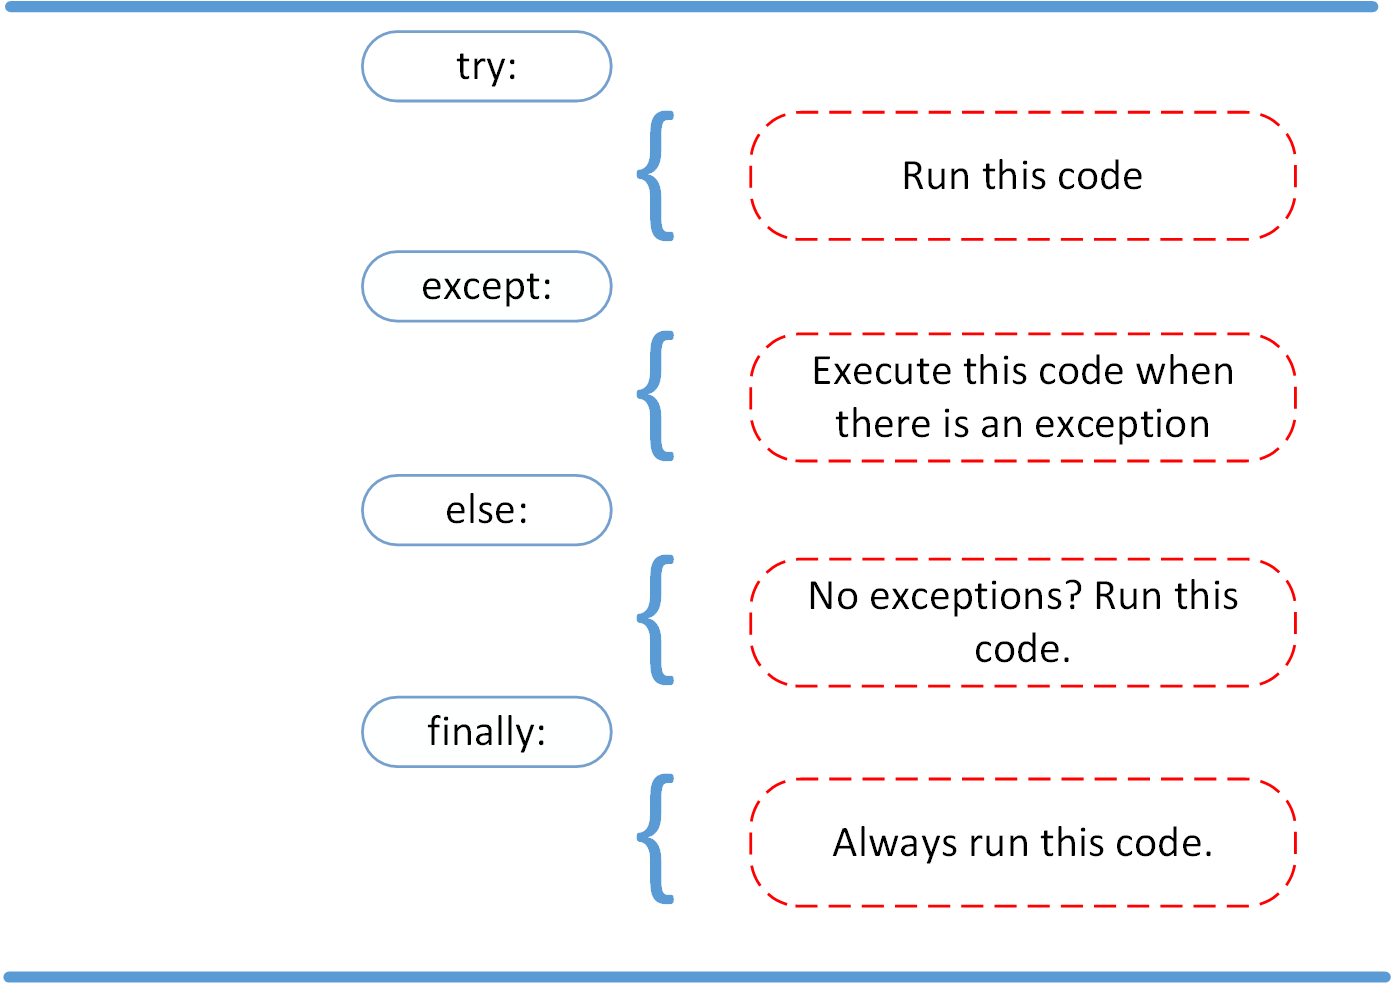

```python
try:                              # (try строго 1)
    try_ suite                    # код, который может выполниться с ошибкой
except exception_group1 as var1:  # (except - 0 (если есть finally) и более)
    except_suite1                 # код, выполняемый в случае исключения 'exception_group1'
...                               # ссылка на исключение может быть записана в 'var1'
except exception_groupN as varN:
    except_suiteN                 # код, выполняемый в случае исключения 'exception_groupN'
...                               # except-блоков может быть произвольное кол-во
else:                             # (else - 0 или 1)
    else_suite                    # выполняется, если try не завершен преждевременно (например, break)
finally:                          # (finally - 0 или 1)
    finally_suite                 # код, который должен выполнится всегда (была ошибка выше или нет)
```

In [ ]:
try:
    x = int(input('Введите целое число x (для вычисления 1/x): '))
    res = 1 / x

    print(f'1/{x} = {res:.2f}')
except:
    print('Произошла ошибка!')

In [ ]:
try:
    x = int(input('Введите целое число x (для вычисления 1/x): '))
    res = 1 / x

    print(f'1/{x} = {res:.2f}')
except Exception as err:
    print('Произошла ошибка!')
    print(f'Тип: {type(err)}')
    print(f'Описание: {err}')

In [ ]:
try:
    x = int(input('Введите целое число x (для вычисления 1/x): '))
    res = 1 / x

    print(f'1/{x} = {res:.2f}')
except ZeroDivisionError:
    print('На ноль делить нельзя!')
except ValueError as err:  # 'err' содержит ссылку на исключение.
    print(f'Будьте внимательны: {err}')
# Исключения можно перечислять в виде кортежа.
except (FileExistsError, FileNotFoundError):
    print('Этого никогда не случится - мы не работаем с файлами')
except Exception as err:
    # Все, что не обработано выше и является потомком 'Exception',
    # будет обработано здесь
    print('Произошла ошибка!')
    print(f'Тип: {type(err)}')
    print(f'Описание: {err}')

## Генерация исключений

```python
raise exception(args)  # явное указание класса возбуждаемого исключения

# или

raise                  # 1) повторное возбуждение активного исключения (re-raise)
                       #    внутри блока except
                       # 2) 'TypeError' по умолчанию
```

In [ ]:
MIN: int = 1
MAX: int = 10

try:
    x: int = int(input(f'Введите целое число от {MIN} до {MAX}: '))

    if not MIN <= x <= MAX:
        # Возбудив исключение, его можно будет обработать в except
        # вместе с другими похожими исключениями
        raise ValueError(f'Число лежит вне интервала [{MIN}; {MAX}]!')

    print('Спасибо!')
except ValueError as err:  # 'err' содержит ссылку на исключение
    print(f'Будьте внимательны: {err}')

## Вложенные обработчки исключений

In [ ]:
import json
import sys

try:
    with open('test.json') as fp:
        try:
            json_dict = json.load(fp)
        except json.JSONDecodeError:
            print('Файл json имеет неправильную структуру.')
    print(json_dict)
except:
    print('Произошла ошибка при разборе json: ', sys.exc_info()[1])

Произошла ошибка при разборе json:  [Errno 2] No such file or directory: 'test.json'


## Создание собственных классов исключений

In [ ]:
class NumbersError(Exception): ...


class EvenError(NumbersError): ...


class NegativeError(NumbersError): ...


def no_even(numbers):
    if all(x % 2 != 0 for x in numbers):
        return True
    raise EvenError('В списке не должно быть чётных чисел.')


def no_negative(numbers):
    if all(x >= 0 for x in numbers):
        return True
    raise NegativeError('В списке не должно быть отрицательных чисел')


def main():
    print('Введите числа в одну строку через пробел: ')

    try:
        numbers = [int(x) for x in input().split()]

        no_negative(numbers) # Здесь переход к обработчику по поряку вызова.
        no_even(numbers)

        print(f'Сумма чисел равна: {sum(numbers)}.')

        # if no_even(numbers) and no_negative(numbers):
            # print(f'Сумма чисел равна: {sum(numbers)}.')
    except NumbersError as e:  # обращение к исключению как к объекту
        print(f'Произошла ошибка: {e}.')
    except Exception as e:
        print(f'Произошла непредвиденная ошибка: {e}.')


if __name__ == "__main__":
    main()

Введите числа в одну строку через пробел: 
1 2 3 4 -5 6 7
Произошла ошибка: В списке не должно быть отрицательных чисел.


## Цепочка исключений

Это стиль Python 2. Просто вызовите еще одно исключение из блока исключений.
В Python 3 это приводит к тому, что исключения привязываются к сообщению:
    
    During handling of the above exception, another exception occurred
    
Что, как правило, неправильно.

In [ ]:
def implicit_chaining():
    try:
        1 / 0
    except Exception:
        raise RuntimeError('Something')

implicit_chaining()

RuntimeError: ignored

Здесь показавается цепочка исключений, где виден порядок вызова.

In [ ]:
def explicit_chaining():
    try:
        1 / 0
    except Exception as ex:
        raise RuntimeError('Something') from ex

explicit_chaining()

RuntimeError: ignored

Данный код подавляет любые исключения дальше по стеку вызовов и
обычно это предпочтительный способ для того, чтобы обратная трассировка была короче, если только «родительские» исключения нужны для отладки, как показано выше.

In [ ]:
def suppress_chaining():
    try:
        1 / 0
    except Exception:
        raise RuntimeError('Something') from None

suppress_chaining()

RuntimeError: ignored

## Менеджеры контекста

In [ ]:
%%python3

class HelloContextManager:
    def __enter__(self):
        print('Entering the context...')
        return 'Hello, World!'

    def __exit__(self, exc_type, exc_value, exc_tb):
        print('Leaving the context...')
        print(exc_type, exc_value, exc_tb, sep='\n')


# Обязательно нужно вызвать объект менеджера (поставить скобки)
with HelloContextManager() as hello:
    print(hello)
    raise ValueError

Entering the context...
Hello, World!
Leaving the context...
<class 'ValueError'>



Traceback (most recent call last):
  File "<stdin>", line 15, in <module>
ValueError


CalledProcessError: ignored

In [ ]:
class HelloContextManager:
    def __enter__(self):
        print('Entering the context...')
        return 'Hello, World!'

    def __exit__(self, exc_type, exc_value, exc_tb):
        print('Leaving the context...')
        if isinstance(exc_value, IndexError):
            # Здесь обрабатывается исключение класса IndexError.
            print(f'An exception occurred in your with block: {exc_type}')
            print(f'Exception message: {exc_value}')
            return True

with HelloContextManager() as hello:
    print(hello)
    hello[100]

print('Continue normally from here...')

Entering the context...
Hello, World!
Leaving the context...
An exception occurred in your with block: <class 'IndexError'>
Exception message: string index out of range


Открытие файла для записи

In [ ]:
%%python3


class WritableFile:
    def __init__(self, file_path):
        self.file_path = file_path

    def __enter__(self):
        self.file_obj = open(self.file_path, mode='w')
        return self.file_obj

    def __exit__(self, exc_type, exc_val, exc_tb):
        if self.file_obj:
            self.file_obj.close()


with WritableFile('hello.txt') as file:
   file.write('Hello, World!')

Перенаправление стандартного потока вывода

In [ ]:
%%python3


import sys

class RedirectedStdout:
    def __init__(self, new_output):
        self.new_output = new_output

    def __enter__(self):
        self.saved_output = sys.stdout
        sys.stdout = self.new_output

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout = self.saved_output


with open('hello.txt', 'w') as file:
    with RedirectedStdout(file):
        print('Hello, World!')
    print('Back to the standard output...')

Back to the standard output...


Пример является синтетическим, правильнее сделать вот так:

In [ ]:
with open('hello.txt', 'w') as fh:
    print('Hello, World!', file=fh)

Еще один вариант расчета времени исполнения произвольного кода

In [ ]:
from time import perf_counter, sleep


class Timer:
    def __enter__(self):
        self.start = perf_counter()
        self.end = 0.0
        return lambda: self.end - self.start

    def __exit__(self, *args):
        self.end = perf_counter()


with Timer() as timer:
    # Time-consuming code goes here...
    sleep(0.5)


timer()

0.5003893439999985

Реализация менеджера контекста на основе функции

In [ ]:
from contextlib import contextmanager

@contextmanager
def hello_context_manager():
    print('Entering the context...')
    yield 'Hello, World!'
    print('Leaving the context...')


with hello_context_manager() as hello:
    print(hello)

Entering the context...
Hello, World!
Leaving the context...


In [ ]:
from contextlib import contextmanager


@contextmanager
def writable_file(file_path):
    file = open(file_path, mode='w')
    try:
        yield file
    finally:
        file.close()


with writable_file('hello.txt') as file:
    file.write('Hello, World!')

# Обзор стандартной библиотеки

## Модуль `math`

In [ ]:
import math

# Гипотенуза прямоугольного треугольника с катетами a и b
a, b = 4, 3
print(math.hypot(a, b))        # 5.0
print(math.sqrt(a**2 + b**2))  # 5.0
print((a**2 + b**2)**0.5)      # 5.0

# Площадь круга
r = 1
print(math.pi * r**2)  # 3.141592653589793

# Вычисление площади треугольника по сторонам и углу между ними
a, b, alpha = 3, 4, 90
print(a * b * math.sin(math.radians(alpha)))  # 5.0

# Округление чисел
print(round(-4/3, 2), round(4/3, 2))             # -1.33, 1.33
print(round(-4/3), round(4/3))                   # -1, 1
print(int(-4/3), int(4/3))                       # -1, 1
print(math.ceil(-4/3), math.ceil(4/3))           # -1, 2
print(math.floor(-4/3), math.floor(4/3))         # -2, 1
print(math.trunc(-4/3), math.trunc(4/3))         # -1, 1
print(math.isclose(1/3, 0.333, abs_tol=0.001))   # True
print(math.isclose(1/3, 0.333, abs_tol=0.0001))  # False

# Степень и логарифмы
print(math.log(math.exp(2)))  # 2.0
print(math.factorial(5))      # 120

5.0
5.0
5.0
3.141592653589793
12.0
-1.33 1.33
-1 1
-1 1
-1 2
-2 1
-1 1
True
False
2.0
120


## Модуль `random`

In [ ]:
import random

random.seed(100)

# Случайное число от 1 до 10
print(random.randint(1, 10))  # 3

# Случайное нечетное число от 1 до 10
print(random.randrange(1, 11, 2))  # 7

# Случайное вещественное число от 0 до 1
print(random.random())  # 0.45492700451402135

# Случайное вещественное число от -10 до 10
print(random.uniform(-10, 10))  # 5.415676113180442

# Список из 5 случайных целых чисел [1, 100]
A = [random.randint(1, 100) for i in range(5)]

print(A)  # [91, 51, 94, 45, 56]

# Список из 10 неповторяющихся целых чисел из отрезка [0, 99]
A = random.sample(range(100), 10)
print(A)  # [33, 6, 84, 82, 26, 42, 29, 39, 98, 22]

# Случайный элемент из последовательности
nums_0_to_5 = list(range(5))
print(random.choice(nums_0_to_5))  # 4

# Перемешиваем список
random.shuffle(nums_0_to_5)
print(nums_0_to_5)  # [2, 1, 3, 4, 0]

## Модуль `statistics`

In [ ]:
import statistics

A = [1, 1, 2, 3, 3, 3, 4, 4, 5, 8, 8, 9]

print(statistics.mean(A))    # 4.25
print(statistics.median(A))  # 3.5
print(statistics.mode(A))    # 3

print(statistics.variance(A))  # 7.4772727272727275
print(statistics.stdev(A))     # 2.7344602259445514

## Модуль `datetime`

In [ ]:
import datetime

# Приветствие в зависимости от времени суток.
t1 = datetime.datetime.now().time()
hours = t1.hour + 1

if 6 <= hours <= 10:
    print('Доброе утро!')
elif 10 < hours <= 18:
    print('Добрый день!')
else:
    print('Доброй ночи!')
print()

# Местное и UTC-время
print('Местное и UTC-время')

d1 = datetime.datetime.utcnow()
d2 = datetime.datetime.now()
td = d1 - d2

print(d1.strftime('%d/%m/%Y %H:%M'), '|', d1)
print(d2.strftime('%d/%m/%Y %H:%M'), '|', d2)
print(f'Разница = {abs(td)}\n')

# Время до события: datetime, timedelta
d1 = datetime.datetime.strptime('01/01/2024 00:00', '%d/%m/%Y %H:%M')
d2 = datetime.datetime.now()
td = d1 - d2

print('До Нового Года осталось')
print(f'Новый 2024 год: {d1.ctime()}')
print(f'Сейчас: {d2.strftime("%a %b %d %H:%M:%S %Y")}')
print(
    f'Осталось: {td.days} дн. {td.seconds//3600} ч. {td.seconds//60 % 60} мин.'
)

Доброе утро!

Местное и UTC-время
20/02/2023 09:26 | 2023-02-20 09:26:17.776644
20/02/2023 09:26 | 2023-02-20 09:26:17.776685
Разница = 0:00:00.000041

До Нового Года осталось
Новый 2024 год: Mon Jan  1 00:00:00 2024
Сейчас: Mon Feb 20 09:26:17 2023
Осталось: 314 дн. 14 ч. 33 мин.


## Модуль `time`

In [ ]:
import time

# Приложение имитирует индикатор прогресса во время установки приложения.
input('Добро пожаловать в инсталлятор! Нажмите <ENTER> для продолжения...')

sec_start = time.perf_counter()
for i in range(100):
    print('#', end='', flush=True)
    # "Засыпаем" на 50 мс.
    time.sleep(0.05)

    if (i + 1) % 10 == 0:
        print(f' {(i + 1):3}')
sec_end = time.perf_counter()

print(f'Программа успешно установлена за {(sec_end - sec_start):.2f}')

Добро пожаловать в инсталлятор! Нажмите <ENTER> для продолжения...
##########  10
##########  20
##########  30
##########  40
##########  50
##########  60
##########  70
##########  80
##########  90
########## 100
Программа успешно установлена за 5.22


## Модуль `calendar`

In [ ]:
import calendar
import datetime

# Текстовый календарь на текущий месяц.

c = calendar.TextCalendar()
d = datetime.date.today()
s = c.formatmonth(d.year, d.month)
print(f'Сегодня: {d}\n\n{s}')

Сегодня: 2023-02-15

   February 2023
Mo Tu We Th Fr Sa Su
       1  2  3  4  5
 6  7  8  9 10 11 12
13 14 15 16 17 18 19
20 21 22 23 24 25 26
27 28



## Пакет `pytz`

In [ ]:
import pytz
import datetime

ALIGN_FIX = 20

# Список идентификаторов находится в pytz.all_timezones или common_timezones
# for tz in pytz.all_timezones:
#     print(tz)
# print(pytz.common_timezones)

# Временная зона MSK
tz_msk = pytz.timezone('Europe/Moscow')
dt1 = datetime.datetime.now(tz_msk)

print(f'{"Московское время":>{ALIGN_FIX}}: {dt1}')
print(f'{"UTC-время":>{ALIGN_FIX}}: {dt1.astimezone(pytz.utc)}')
print(f'{"Отклонение от UTC":>{ALIGN_FIX}}: {dt1.utcoffset()}')
print(f'{"Сдвиг лето/зима":>{ALIGN_FIX}}: {dt1.dst()}')

# Временные зоны можно использовать из модуля pytz или
# создать собственные, используя datetime.timezone.
tz_bj = datetime.timezone(datetime.timedelta(hours=8), 'China/Beijing')
tz_pa = pytz.timezone('Europe/Paris')
tz_wa = pytz.timezone('US/Pacific')

print(f'{"Пекин":>{ALIGN_FIX}}: {dt1.astimezone(tz_bj)}')
print(f'{"Париж":>{ALIGN_FIX}}: {dt1.astimezone(tz_pa)}')
print(f'{"Нью-Йорк":>{ALIGN_FIX}}: {dt1.astimezone(tz_wa)}')

    Московское время: 2023-02-20 18:00:08.364125+03:00
           UTC-время: 2023-02-20 15:00:08.364125+00:00
   Отклонение от UTC: 3:00:00
     Сдвиг лето/зима: 0:00:00
               Пекин: 2023-02-20 23:00:08.364125+08:00
               Париж: 2023-02-20 16:00:08.364125+01:00
            Нью-Йорк: 2023-02-20 07:00:08.364125-08:00


## Модули для работы с операционной системой

In [ ]:
import sys
import os
import platform
import subprocess

# Создадим файл с информацией о платформе/ОС и откроем его
# в редакторе по умолчанию.

if __name__ == '__main__':

    # Путь (относительный) к файлу с данными
    # Создание файла будет происходить в рабочей директории
    data_filename = 'data.txt'

    # Создаем файл
    with open(data_filename, 'w', encoding='utf-8') as fh:
        fh.write(f'Файл с данными: {data_filename}\n\n')

        fh.write('os.environ')
        for name in sorted(os.environ):
            fh.write(f'  {name} = {os.environ[name]}\n')

        fh.write(f'\nsys.copyright = {sys.copyright}\n\n')

        fh.write(f'sys.version_info = {sys.version_info}\n\n')
        fh.write(f'sys.path = {sys.path}\n\n')
        fh.write(f'sys.argv = {sys.argv}\n\n')
        fh.write(f'sys.byteorder = {sys.byteorder}\n\n')
        fh.write(
            f'sys.getfilesystemencoding() = {sys.getfilesystemencoding()}\n\n'
        )
        fh.write(f'sys.maxsize = {sys.maxsize}\n\n')

        fh.write(f'platform.uname() = {platform.uname()}')

In [ ]:
%%python3

import sys
import os
import os.path
import pathlib
import glob
import shutil

# Скопируем все *.py файлы из директории скрипта
# в дочернюю папку Scripts

if __name__ == '__main__':

    # 1) Определяем пути
    # Абсолютный путь к скрипту.
    app_path = os.path.dirname(os.path.realpath(sys.argv[0]))

    # 2) Создаем папку Scripts.
    scripts_path = os.path.join(app_path, 'Scripts')
    # Если папка уже есть - удаляем по запросу и выходим
    if os.path.exists(scripts_path):
        answer = input('Уже копировали ранее! Удалить папку? (y/n) ').upper()
        if answer == 'Y':
            shutil.rmtree(scripts_path)
            print('Папка удалена.')
        sys.exit('Программа будет завершена.')  # Выход из скрипта
    os.makedirs(scripts_path, exist_ok=True)

    # 3) Находим и копируем файлы.
    filenames = glob.glob(os.path.join(app_path, '*.py'))
    for filename in filenames:
        if os.path.isfile(filename):
            shutil.copy2(filename, scripts_path)

    # 4) Отображаем файлы из новой директории.
    filenames_new = os.listdir(scripts_path)
    print(f'Найдено скопированных файлов: {len(filenames_new)}')
    for filename in sorted(filenames_new):
        print(f' - {filename} | {os.path.getsize(filename) / 1024:.2f} КБ')

## Модуль `re`

Сервис для написания и отладки регулярных выражений https://regex101.com

In [ ]:
import re

# Необходимо найти все e-mail в заданном тексте

# Данные шаблон сильно упрощен для понимания!
# см. http://stackoverflow.com/questions/201323/
#     using-a-regular-expression-to-validate-an-email-address
EMAIL_REGEX = r'[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+[a-zA-Z]'

text = """Это произвольный текст, в котором будет происходить поиск
адресов электронной почты (e-mail). Скажу сразу, что мой e-mail
ya@gmail.com; папы и мамы: papa@mail.ru и mama@yandex.ru, а также брата
brat@hotmail.com и даже моего любимого кота: pushok@rambler.ru."""

# 1. Используя re.search() + re.finditer()
if re.search(EMAIL_REGEX, text, re.MULTILINE):
    for item in re.finditer(EMAIL_REGEX, text):
        # 'item' - объект класса match
        print(f'Найден e-mail: {item.group(0)}, позиция {item.span()}.')
else:
    print('Ни одного e-mail не найдено!')

# 2. Используя re.findall()
res = re.findall(EMAIL_REGEX, text, re.MULTILINE)
if len(res) > 0:
    for item in res:  # 'item' - строка
        print(f'Найден e-mail: {item}.')
else:
    print('Ни одного e-mail не найдено!')

Найден e-mail: ya@gmail.com, позиция (122, 134)
Найден e-mail: papa@mail.ru, позиция (149, 161)
Найден e-mail: mama@yandex.ru, позиция (164, 178)
Найден e-mail: brat@hotmail.com, позиция (194, 210)
Найден e-mail: pushok@rambler.ru, позиция (239, 256)
Найден e-mail: ya@gmail.com
Найден e-mail: papa@mail.ru
Найден e-mail: mama@yandex.ru
Найден e-mail: brat@hotmail.com
Найден e-mail: pushok@rambler.ru


In [ ]:
import re

# Необходимо найти все телефоны и их описание

page = """
http://минобрнауки.рф/контакты
Минобрнауки России                      Телефоны для связи
Справочная служба                       +7 (495) 539 55 19
Факс                                    +7 (495) 629 08 91
"Горячая линия"                         +7 (499) 553 09 63
Общественная приемная                   +7 (499) 236 18 83
Контакты для представителей СМИ         +7 (495) 629 92 12
Отдел государственной службы и кадров   +7 (495) 629 36 42
"""

# 1. re.compile() + regex.finditer() + нумерованная группа
print('1. нумерованные группы')
PHONE_REGEX = r'^(.+?)\s+(\+7 \(\d{3}\) \d{3} \d{2} \d{2})$'
regex = re.compile(PHONE_REGEX, re.MULTILINE)
for match in regex.finditer(page):
    name, phone = match.group(1, 2)
    print(f'Наименование: "{name}", Телефон: "{phone}"')

# 2. re.compile() + regex.finditer() + именованная группа
print('\n2. именованные группы')
PHONE_REGEX = r'^(?P<Наименование>.+?)\s+' \
               '(?P<Телефон>\+7 \(\d{3}\) \d{3} \d{2} \d{2})$'

regex = re.compile(PHONE_REGEX, re.MULTILINE)
for match in regex.finditer(page):
    name = match.group('Наименование')
    phone = match.group('Телефон')
    print(f'Наименование: "{name}", Телефон: "{phone}"')

# 3. re.compile() + regex.finditer() + regex.groupdict()
print('\n3. regex.groupdict()')
for match in regex.finditer(page):  # regex уже был создан во 2-м пункте
    # Словарь match.groupdict() содержит все именованные группы
    msg = 'Наименование: "{Наименование}", Телефон: "{Телефон}"'
    print(msg.format(**match.groupdict()))

1. нумерованные группы
Наименование: "Справочная служба", Телефон: "+7 (495) 539 55 19"
Наименование: "Факс", Телефон: "+7 (495) 629 08 91"
Наименование: ""Горячая линия"", Телефон: "+7 (499) 553 09 63"
Наименование: "Общественная приемная", Телефон: "+7 (499) 236 18 83"
Наименование: "Контакты для представителей СМИ", Телефон: "+7 (495) 629 92 12"
Наименование: "Отдел государственной службы и кадров", Телефон: "+7 (495) 629 36 42"

2. именованные группы
Наименование: "Справочная служба", Телефон: "+7 (495) 539 55 19"
Наименование: "Факс", Телефон: "+7 (495) 629 08 91"
Наименование: ""Горячая линия"", Телефон: "+7 (499) 553 09 63"
Наименование: "Общественная приемная", Телефон: "+7 (499) 236 18 83"
Наименование: "Контакты для представителей СМИ", Телефон: "+7 (495) 629 92 12"
Наименование: "Отдел государственной службы и кадров", Телефон: "+7 (495) 629 36 42"

3. regex.groupdict()
Наименование: "Справочная служба", Телефон: "+7 (495) 539 55 19"
Наименование: "Факс", Телефон: "+7 (495) 

# Элементы функционального программирования

In [ ]:
import math

# 1. Ввод нескольких чисел в одной строке.
a, b, c = map(int, input('Введите 3 числа через пробел: ').split())
print(a, b, c)

# 2. Формируем список квадратов элементов.
values = list(range(6))
print(values)  # [0, 1, 2, 3, 4, 5]

# 2.1. Стандартный метод с использованием цикла for.
squared = []
for x in values:
    squared.append(x**2)

print(squared)  # [0, 1, 4, 9, 16, 25]

# 2.2. map
squared = list(map(lambda x: x**2, values))
print(squared)  # [0, 1, 4, 9, 16, 25]

# 3. Несколько итерируемых объектов в map: получаем список степеней чисел.
powers = list(map(math.pow, values, [2, 3, 4]))
print(powers)  # [0.0, 1.0, 16.0]

Введите 3 числа через пробел: 1 2 3
1 2 3
[0, 1, 2, 3, 4, 5]
[0, 1, 4, 9, 16, 25]
[0, 1, 4, 9, 16, 25]
[0.0, 1.0, 16.0]


In [ ]:
# Создать список отрицательных чисел из произвольного списка чисел.
values = list(range(-10, 11))

# 1.1. Стандартный метод с использованием цикла for
negatives = []
for x in values:
    if x < 0:
        negatives.append(x)

# 1.2. Списковое включение
negatives_2 = [x for x in values if x < 0]

# 1.3. filter
negatives_3 = list(filter(lambda x: x < 0, values))

print(negatives)
print(negatives_2)
print(negatives_3)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1]
[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1]
[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1]


In [ ]:
import random
import functools

# 1. Сумма и произведение чисел в списке.
random.seed(101)

values = list(random.sample(range(-15, 15), 5))
print(values)

# 1.1. Стандартный for.
l_sum = 0
l_mult = 1
for value in values:
    l_sum += value
    l_mult *= value

# 1.2. reduce.
l_sum_2 = functools.reduce(lambda res, y: res + y, values)
l_mult_2 = functools.reduce(lambda res, y: res * y, values)

print(l_sum, l_mult)      # 22 -9072
print(l_sum_2, l_mult_2)  # 22 -9072

# 2. Формирование строки из списка.
strings = 'Болтовня ничего не стоит. Покажите мне код. Linus Torvalds'.split()
print(strings)

# 2.1. Стандартный ' '.join()
expr_1 = ' '.join(strings)

# 2.2. reduce
expr_2 = functools.reduce(lambda res, y: f'{res} {y}', strings)

print(expr_1)
print(expr_2)

[3, 12, -9, 14, 2]
22 -9072
22 -9072
['Болтовня', 'ничего', 'не', 'стоит.', 'Покажите', 'мне', 'код.', 'Linus', 'Torvalds']
Болтовня ничего не стоит. Покажите мне код. Linus Torvalds
Болтовня ничего не стоит. Покажите мне код. Linus Torvalds


# Сторонние библиотеки

## Библиотека numpy

In [ ]:
import numpy as np

Простой массив из списка

In [ ]:
np.array([1, 2, 3, 4])

array([1, 2, 3, 4])

Пустой массив размерности 3 на 3

In [ ]:
np.empty((3, 3))

array([[1.70092098e-316, 0.00000000e+000, 6.92874066e-310],
       [1.63090200e-316, 0.00000000e+000, 0.00000000e+000],
       [9.88131292e-324, 0.00000000e+000, 3.95252517e-322]])

Массив из диапазона

In [ ]:
np.arange(4)

array([0, 1, 2, 3])

Массив нулей

In [ ]:
np.zeros((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

Массив единиц

In [ ]:
np.ones((3,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

Массив, представляющей дискретные значения непрерывной линейной фукнкции

In [ ]:
np.linspace(0, 1, 21)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

Массив, представляющей дискретные значения непрерывной логарифмической фукнкции

In [ ]:
np.logspace(-2, 2, 5)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

Скалярное сложение

In [ ]:
x = np.arange(4)
x + 10

array([10, 11, 12, 13])

In [ ]:
x + x

array([0, 2, 4, 6])

Скалярное умножение

In [ ]:
x * 2

array([2, 3, 4, 5])

In [ ]:
x * x

array([0, 1, 4, 9])

Умножение матриц

In [ ]:
x = np.diag(np.arange(4))
print(x, end='\n\n')

print(x @ x, end='\n\n')
print(type(x @ x))

[[0 0 0 0]
 [0 1 0 0]
 [0 0 2 0]
 [0 0 0 3]]

[[0 0 0 0]
 [0 1 0 0]
 [0 0 4 0]
 [0 0 0 9]]

<class 'numpy.ndarray'>


Добавление элементов другого массива, возвращается новый объект!!!

In [ ]:
#np.append(array, values_to_append, axis=None)
x = np.array([0, 1, 2, 3, 4])
print(x)

y = np.append(x, [5, 6, 7, 8, 9])
print(y)

[0 1 2 3 4]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# np.hstack(tup), np.vstack(tup)
x = np.array([0,0,0])
y = np.array([1,1,1])
z = np.array([2,2,2])

print(np.hstack((x, y, z)))
print(np.vstack((x, y, z)))

[0 0 0 1 1 1 2 2 2]
[[0 0 0]
 [1 1 1]
 [2 2 2]]


Доступ к элементам массивов

In [ ]:
x = np.arange(10)

print(x, end='\n\n')

print(x[0], end='\n\n')

print(x[0:4], end='\n\n')

print(x[:4:2], end='\n\n')

print(x[-1], end='\n\n')

print(x[::-1], end='\n\n')

[0 1 2 3 4 5 6 7 8 9]

0

[0 1 2 3]

[0 2]

9

[9 8 7 6 5 4 3 2 1 0]



In [ ]:
x = np.arange(16).reshape((4, 4))

print(x, end='\n\n')

# строка, столбец
# начиная с левого верхнего угла
# нумерация с нуля
print(x[1, 1], end='\n\n')

print(x[:3, 0], end='\n\n')

print(x[:3, :3], end='\n\n')

print(x[:3:2, :3:2], end='\n\n')

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

5

[0 4 8]

[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]]

[[ 0  2]
 [ 8 10]]



Транспонирование матриц

In [ ]:
arr = np.arange(10).reshape(2, 5)

print(arr, end='\n\n')

print(arr.transpose(), end='\n\n')

# print(arr.T, end='\n\n')
# print(np.transpose(arr), end='\n\n')

[[0 1 2 3 4]
 [5 6 7 8 9]]

[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]



Получение массива из файл CSV

Подробнее: https://riptutorial.com/numpy/topic/4973/file-io-with-numpy

In [ ]:
data = np.genfromtxt(path)

Многомерные массивы

In [ ]:
x = np.arange(15)
print(x.shape)

x = np.asarray([[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14]])
print(x)
print(x.shape)

(15,)
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
(3, 5)


Работа с булевыми массивами: https://riptutorial.com/numpy/topic/6072/boolean-indexing

Фильтрация данных

In [ ]:
a = np.arange(20).reshape(2, 10)
print(a)

# Создание предиката, результат -- массив булевых значение.
condition = np.bitwise_and(a > 7, a < 13)
print(condition)

# Получение координат истинных значений.
ind = np.where(condition)
print(ind)

# Получение массива отфильтрованных значений.
keep = a[ind]
print(keep)

# То же самое в одну строку
# keep = np.extract(condition, a)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]
[[False False False False False False False False  True  True]
 [ True  True  True False False False False False False False]]
(array([0, 0, 1, 1, 1]), array([8, 9, 0, 1, 2]))
[ 8  9 10 11 12]


Подробнее про фильтацию данных: https://riptutorial.com/numpy/topic/6187/filtering-data

Генерация случайных данных

In [ ]:
np.random.rand(5)

array([0.81724211, 0.35275753, 0.15038817, 0.37782065, 0.12830224])

Обновление генератора случайных чисел

In [ ]:
np.random.seed(0)
np.random.rand(5)

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ])

Для целых чисел

In [ ]:
np.random.randint(10, 20, (5, 5))

array([[15, 12, 14, 17, 16],
       [18, 18, 11, 16, 17],
       [17, 18, 11, 15, 19],
       [18, 19, 14, 13, 10],
       [13, 15, 10, 12, 13]])

Подробнее про последовательности случайных чисел:  https://riptutorial.com/numpy/topic/2060/generating-randomdata

Линейная алгебра

Решение системы уравнений
```
x0 + 2 * x1 + x2 = 4
         x1 + x2 = 3
x0 +          x2 = 5
```

In [ ]:
A = np.array([
    [1, 2, 1],
    [0, 1, 1],
    [1, 0, 1]
])
b = np.array([4, 3, 5])

In [ ]:
x = np.linalg.solve(A, b)
print(x)

[ 1.5 -0.5  3.5]


Подробнее про линейную алгебру: https://riptutorial.com/numpy/topic/3753/linear-algebrawith-np-linalg

## Библиотека matplotlib

In [ ]:
import numpy as np

# От 2 до 8, 4 дискретных элемента.
x = np.linspace(2, 8, 4)
print(x) # [ 2.  4.  6.  8.]

sinx = np.sin(x)
print(sinx)

cosx = np.cos(x)
print(cosx)

ur = np.random.rand(4)
print(ur)

nr = np.random.randn(4)
print(nr)

[2. 4. 6. 8.]
[ 0.90929743 -0.7568025  -0.2794155   0.98935825]
[-0.41614684 -0.65364362  0.96017029 -0.14550003]
[0.79915856 0.46147936 0.78052918 0.11827443]
[-0.96075461  0.37692697  0.03343893  0.68056724]


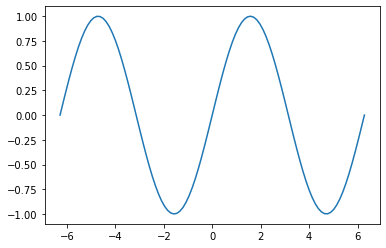

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#  Закрыть все окна с графиками, если они открыты.
plt.close('all')

x = np.linspace(-2*np.pi, 2*np.pi, 100)
sinx = np.sin(x)

plt.plot(x, sinx)
plt.show()

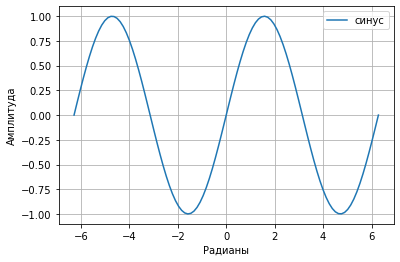

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')

x = np.linspace(-2*np.pi, 2*np.pi, 100)
sinx = np.sin(x)
plt.plot(x, sinx, label='синус')

plt.legend(loc='best')

plt.xlabel('Радианы')
plt.ylabel('Амплитуда')

plt.grid()
plt.show()

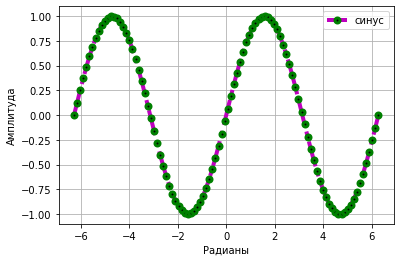

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')


x = np.linspace(-2*np.pi, 2*np.pi, 100)
sinx = np.sin(x)

plt.plot(
    x,
    sinx,
    color='m',
    linestyle='-.',
    linewidth=4,
    marker='o',
    markerfacecolor='k',
    markeredgecolor='g',
    markeredgewidth=3,
    markersize=5,
    label='синус'
)

plt.legend(loc='best')

plt.xlabel('Радианы')
plt.ylabel('Амплитуда')

plt.grid()
plt.show()

Стили линий

|**Обозначение**|**Описание**|
|---------------|------------|
|-.|штрих-пунктирная линия|
|--|штриховая линия|
|:|пунктирная линия|
|-|сплошная линия|

Стили маркеров

|**Обозначение**|**Описание**|
|---------------|------------|
|o|круг|
|x|крест|
|D|ромб|
|h|шестиугольник|
|p|пятиугольник|
|+|плюс|
|.|точка|
|s|квадрат|
|\*|звезда|
|V|треугольник вниз|
|<|треугольник влево|
|>|треугольник вправо|
|^|треугольник вверх|

Стандартные цвета

|**Обозначение**|**Описание**|
|---------------|------------|
|k|черный|
|b|синий|
|c|голубой|
|g|зеленый|
|m|пурпурный|
|r|красный|
|w|белый|
|y|желтый|



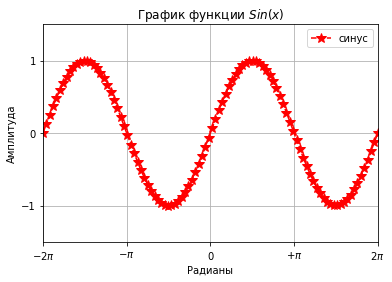

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.close('all')

x = np.linspace(-2*np.pi, 2*np.pi, 100)
sinx = np.sin(x)

plt.plot(x, sinx, '*--r', markersize=10, label='синус')

plt.legend(loc='best')

plt.xlabel('Радианы')
plt.ylabel('Амплитуда')

plt.grid()

plt.xlim([-2*np.pi, 2*np.pi])
plt.ylim([-1.5, 1.5])

plt.xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi],
          [r'$-2\pi$', r'$-\pi$', r'$0$', r'$+\pi$', r'2$\pi$'])
plt.yticks([-1, 0, +1])

plt.title("График функции $Sin(x)$")
plt.show()

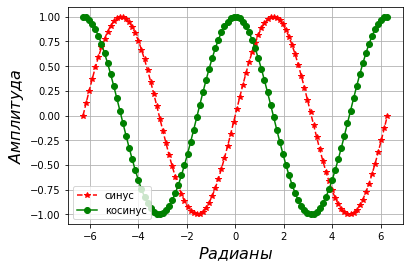

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')

x = np.linspace(-2*np.pi, 2*np.pi, 100)
sinx = np.sin(x)
cosx = np.cos(x)

plt.plot(x, sinx, '*--r', label='синус')
plt.plot(x, cosx, 'o-g', label='косинус')

plt.legend(loc='best')

plt.xlabel(r'$Радианы$').set_fontsize(16)
plt.ylabel(r'$Амплитуда$').set_fontsize(16)
plt.grid()

plt.show()

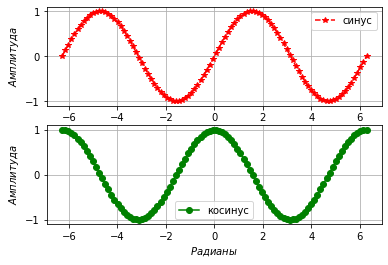

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')

x = np.linspace(-2*np.pi, 2*np.pi, 100)
sinx = np.sin(x)
cosx = np.cos(x)

plt.subplot(2, 1, 1)
plt.plot(x, sinx, '*--r', label='синус')
plt.grid()
plt.legend()
plt.xlabel(r'$Радианы$')
plt.ylabel(r'$Амплитуда$')

plt.subplot(2,1,2)
plt.plot(x,cosx, 'o-g', label='косинус')
plt.grid()
plt.legend()
plt.xlabel(r'$Радианы$')
plt.ylabel(r'$Амплитуда$')

plt.xlabel(r'$Радианы$')
plt.ylabel(r'$Амплитуда$')

plt.show()

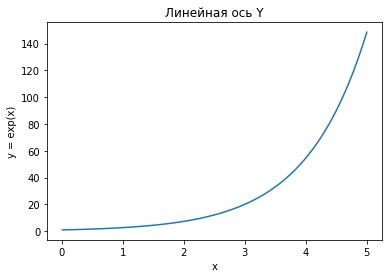

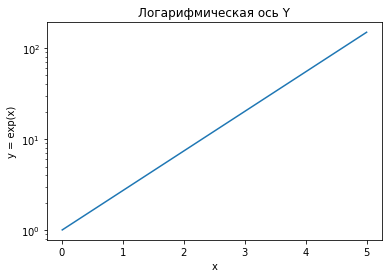

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.close('all')

x = np.linspace(0.01, 5, 100)
e = np.exp(x)

plt.plot(x, e)
plt.xlabel('x')
plt.ylabel('y = exp(x)')
plt.title('Линейная ось Y')

plt.figure()
plt.semilogy(x, e)
plt.xlabel('x')
plt.ylabel('y = exp(x)')
plt.title('Логарифмическая ось Y')

plt.show()

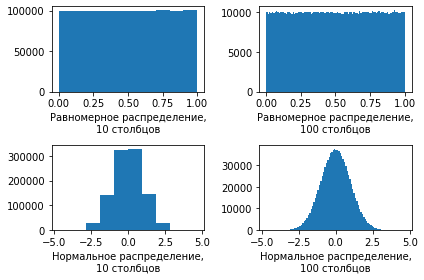

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')

ur = np.random.rand(1000000)
nr = np.random.randn(1000000)

plt.subplot(221)
plt.hist(ur)
plt.xlabel('Равномерное распределение,\n10 столбцов')

plt.subplot(222)
plt.hist(ur, 100)
plt.xlabel('Равномерное распределение,\n100 столбцов')

plt.subplot(223)
plt.hist(nr)
plt.xlabel('Нормальное распределение,\n10 столбцов')

plt.subplot(224)
plt.hist(nr, 100)
plt.xlabel('Нормальное распределение,\n100 столбцов')

plt.tight_layout()

plt.show()

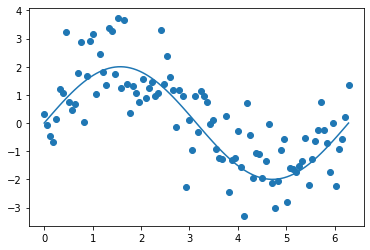

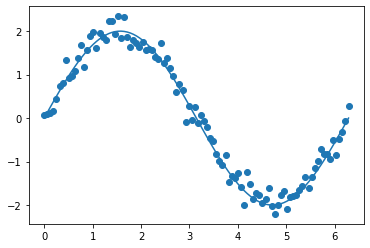

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')

N = 100
x = np.linspace(0, 2*np.pi, N)
noise = np.random.randn(N)
signal = 2*np.sin(x)

y = signal + noise
plt.plot(x, signal)
plt.scatter(x, y)

plt.figure()
y = signal + 0.2*noise
plt.plot(x, signal)
plt.scatter(x, y)

plt.show()

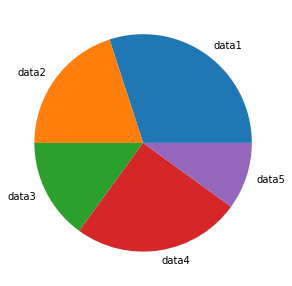

In [ ]:
import matplotlib.pyplot as plt

plt.close('all')

x = [30, 20, 15, 25, 10]
data = ['data1', 'data2', 'data3', 'data4', 'data5']

plt.figure(figsize=(5, 5))
plt.pie(x, labels=data)

plt.show()

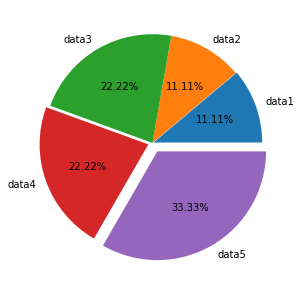

In [ ]:
import matplotlib.pyplot as plt

plt.close('all')

x = [10, 10, 20, 20, 30]
data = ['data1', 'data2', 'data3', 'data4', 'data5']
explode = [0.01, 0, 0, 0.04, 0.09]

plt.figure(figsize=(5,5))
plt.pie(x, explode=explode, labels=data, autopct='%.2f%%')
plt.show()

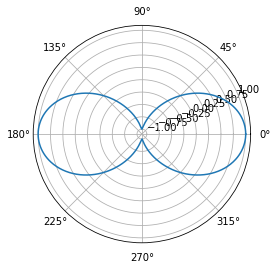

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')

x=np.linspace(0,2*np.pi, 1000)

y = np.cos(2*x)
plt.polar(x, y)

plt.show()

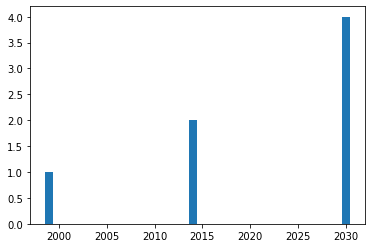

In [ ]:
import matplotlib.pyplot as plt

plt.close('all')

x = [1, 2, 4]
years = [1999, 2014, 2030]

plt.bar(years, x)

plt.show()

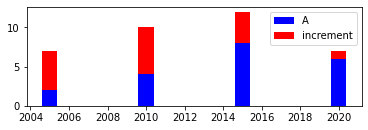

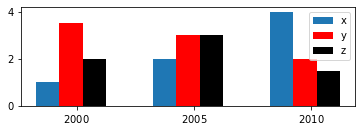

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')

A = [2, 4, 8, 6]
increment = [5, 6, 4, 1]
years = [2005, 2010, 2015, 2020]

plt.subplot(211)
plt.bar(years, A, color='b', label='A')
plt.bar(years, increment, color='r', bottom=A, label='increment')
plt.legend()

plt.show()

x = [1, 2, 4]
y = [3.5, 3, 2]
z = [2, 3, 1.5]

width = 0.2
locs = np.arange(1, len(x)+1)

plt.subplot(212)
plt.bar(locs, x, width=width, label='x')
plt.bar(locs+width, y, width=width, color='red', label='y')
plt.bar(locs+2*width, z, width=width, color='black', label='z')
plt.legend()

plt.xticks(
    [1.25, 2.25, 3.25],
    [r'$2000$', r'$2005$', r'$2010$']
)

plt.show()

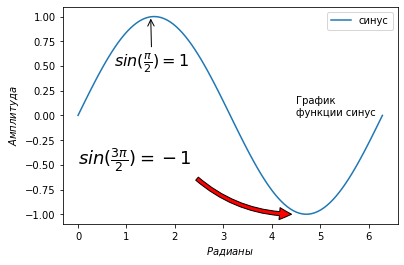

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.close('all')

x = np.linspace(0, 2*np.pi, 100)
sinx = np.sin(x)
plt.plot(x,sinx, label='синус')

plt.legend(loc='best')

plt.xlabel(r'$Радианы$')
plt.ylabel(r'$Амплитуда$')

# Аннотации
# Виды стрелок
# '-', '->', '-[', '<-', '<->', 'fancy', 'simple', 'wedge'

plt.annotate(
    r'$sin(\frac{\pi}{2})=1$',
    fontsize=16,
    xy=(1.5, 1),
    xytext=(0.75, 0.5),
    arrowprops=dict(arrowstyle='->'),
)


# width: ширина стрелки в пунктах.
# shrink: cмещает кончик и основание стрелки на несколько процентов от
# аннотируемой точки и текста.
plt.annotate(
    r'$sin(\frac{3\pi}{2})=-1$',
    fontsize=18,
    xy=(4.5, -1),
    xytext=(0, -0.5),
    arrowprops=dict(
        facecolor='red',
        shrink=0.04,
        connectionstyle='arc3,rad=.2'
    ),
)

plt.text(4.5, 0, 'График \nфункции синус');

plt.show()

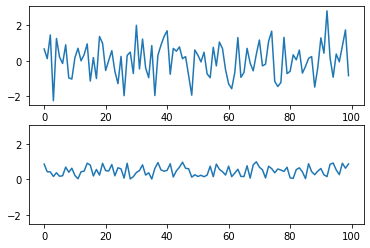

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
x = np.arange(N)
rn = np.random.randn(N)
r = np.random.rand(N)

fig1 = plt.figure()

subfig1 = fig1.add_subplot(211)
subfig2 = fig1.add_subplot(212, sharey=subfig1)

subfig1.plot(x, rn)
subfig2.plot(x, r)

plt.show()

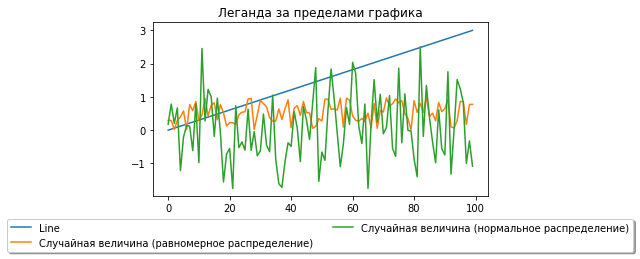

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.close('all')

ur = np.random.rand(100)
nr = np.random.randn(100)
x = np.linspace(0, 3, 100)

ax = plt.subplot(1, 1, 1)

ax.plot(x, label='Line')
ax.plot(ur, label='Случайная величина (равномерное распределение)')
ax.plot(nr, label='Случайная величина (нормальное распределение)')
ax.set_title('Леганда за пределами графика')

box = ax.get_position()
ax.set_position([
    box.x0,
    box.y0 + box.height*0.2,
    box.width,
    box.height*0.8
])

ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    fancybox=True,
    shadow=True,
    ncol=2
)

plt.show()

## Библиотека pandas

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [ ]:
dates = pd.date_range('20230101', periods=6)
dates

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

|**Обозначение**|**Описание**|
|---------------|------------|
|B|        business day frequency|
|C|        custom business day frequency|
|D|        calendar day frequency|
|W|        weekly frequency|
|M|        month end frequency|
|SM|       semi-month end frequency (15th and end of month)|
|BM|       business month end frequency|
|CBM|      custom business month end frequency|
|MS|       month start frequency|
|SMS|      semi-month start frequency (1st and 15th)|
|BMS|      business month start frequency|
|CBMS|     custom business month start frequency|
|Q|        quarter end frequency|
|BQ|       business quarter end frequency|
|QS|       quarter start frequency|
|BQS|      business quarter start frequency|
|A, Y|     year end frequency|
|BA, BY|   business year end frequency|
|AS, YS|   year start frequency|
|BAS, BYS| business year start frequency|
|BH|       business hour frequency|
|H|        hourly frequency|
|T, min|   minutely frequency|
|S|        secondly frequency|
|L, ms|    milliseconds|
|U, us|    microseconds|
|N|        nanoseconds|

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2023-01-01,-0.077149,-0.858261,-1.031170,-2.760291
2023-01-02,0.282787,-0.708057,-0.664416,-0.946765
2023-01-03,0.896976,-1.127394,-0.274705,-1.214324
2023-01-04,0.600202,0.544382,0.699934,0.996265
2023-01-05,-1.586050,0.685354,0.014999,-2.118447
2023-01-06,1.334324,-0.354798,1.051128,0.289576


In [ ]:
df2 = pd.DataFrame({
    'A': 1.0,
    'B': pd.Timestamp('20230102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(['test', 'train', 'test', 'train']),
    'F': 'foo',
})

df2

,A,B,C,D,E,F
0,1.0,2023-01-02,1.0,3,test,foo
1,1.0,2023-01-02,1.0,3,train,foo
2,1.0,2023-01-02,1.0,3,test,foo
3,1.0,2023-01-02,1.0,3,train,foo


In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [ ]:
df.head()

,A,B,C,D
2023-01-01,-0.077149,-0.858261,-1.031170,-2.760291
2023-01-02,0.282787,-0.708057,-0.664416,-0.946765
2023-01-03,0.896976,-1.127394,-0.274705,-1.214324
2023-01-04,0.600202,0.544382,0.699934,0.996265
2023-01-05,-1.586050,0.685354,0.014999,-2.118447


In [ ]:
df.tail(3)

,A,B,C,D
2023-01-04,0.600202,0.544382,0.699934,0.996265
2023-01-05,-1.586050,0.685354,0.014999,-2.118447
2023-01-06,1.334324,-0.354798,1.051128,0.289576


In [ ]:
df.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [ ]:
df.to_numpy()

array([[ 0.35798226, -0.41568475, -0.49238887,  0.82195091],
       [ 0.48576354, -0.35266706, -0.16309549,  1.93705836],
       [ 0.29354881,  0.37979558,  0.76406722, -0.53612728],
       [-0.45629657,  0.06305579,  2.30329698,  0.41202511],
       [ 0.01579674,  0.76689931, -0.61106589,  0.04200044],
       [ 0.02876169,  0.6989811 ,  2.19870327,  0.07781383]])

In [ ]:
df2.to_numpy()

array([[1.0, Timestamp('2023-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2023-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2023-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2023-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [ ]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.241848,-0.303129,-0.034038,-0.958998
std,1.019388,0.754930,0.796024,1.416779
min,-1.586050,-1.127394,-1.031170,-2.760291
25%,0.012835,-0.820710,-0.566988,-1.892416
50%,0.441494,-0.531428,-0.129853,-1.080544
75%,0.822782,0.319587,0.528701,-0.019509
max,1.334324,0.685354,1.051128,0.996265


In [ ]:
df['A']

2023-01-01   -0.077149
2023-01-02    0.282787
2023-01-03    0.896976
2023-01-04    0.600202
2023-01-05   -1.586050
2023-01-06    1.334324
Freq: D, Name: A, dtype: float64

Больше информации: https://pandas.pydata.org/docs/user_guide/10min.html

## Библиотека Pillow

(600, 802) RGB JPEG


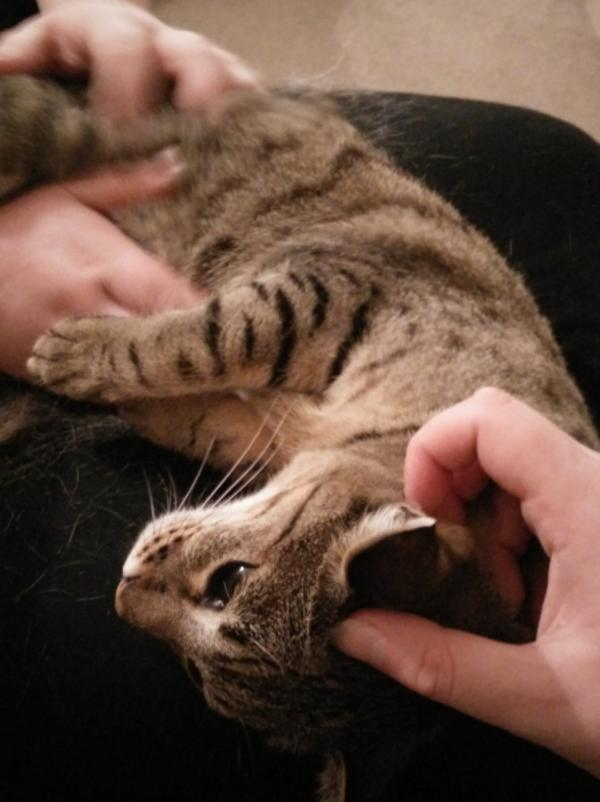

In [1]:
import requests, json

from PIL import Image
from io import BytesIO


image_url = 'https://cataas.com/cat'

response = requests.get(image_url)
im = Image.open(BytesIO(response.content))

print(im.size, im.mode, im.format)

im
# im.show()

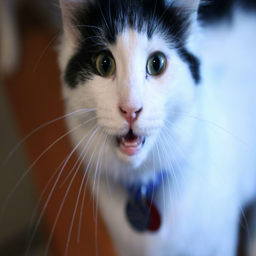

In [ ]:
im = im.resize((256, 256))
im

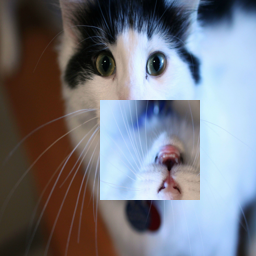

In [ ]:
box = (100, 100, 200, 200)

cropped_part = im.crop(box)
cropped_part = cropped_part.transpose(Image.ROTATE_180)

im.paste(cropped_part,box)
im

In [ ]:
def roll(image, delta):
    xsize, ysize = image.size

    delta = delta % xsize
    if delta == 0:
        return image

    part1 = image.crop((0, 0, delta, ysize))
    part2 = image.crop((delta, 0, xsize, ysize))

    image.paste(part2, (0, 0, xsize-delta, ysize))
    image.paste(part1, (xsize-delta, 0, xsize, ysize))

    return image

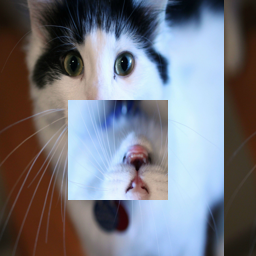

In [ ]:
roll(im, 200)

Цветовые каналы изображения

In [ ]:
im.getbands()

('R', 'G', 'B')

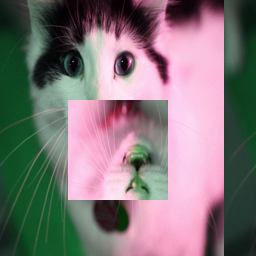

In [ ]:
r, g, b = im.split()
Image.merge('RGB', (b, r, g))

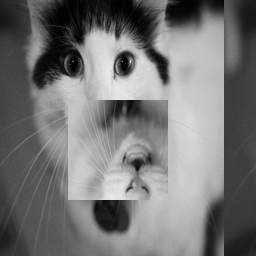

In [ ]:
r

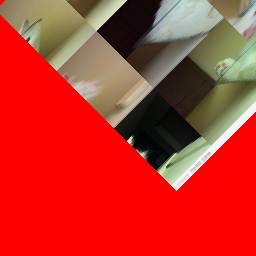

In [ ]:
im.rotate(45, center=(10, 10), fillcolor=(255, 0, 0))

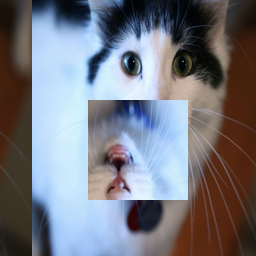

In [ ]:
im.transpose(Image.FLIP_LEFT_RIGHT)

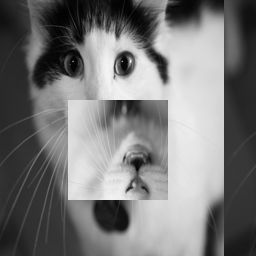

In [ ]:
im.convert('L')

- 1 (1-bit pixels, black and white, stored with one pixel per byte)
- L (8-bit pixels, black and white)
- P (8-bit pixels, mapped to any other mode using a color palette)
- RGB (3x8-bit pixels, true color)
- RGBA (4x8-bit pixels, true color with transparency mask)
- CMYK (4x8-bit pixels, color separation)
- YCbCr (3x8-bit pixels, color video format)
- LAB (3x8-bit pixels, the L*a*b color space)
- HSV (3x8-bit pixels, Hue, Saturation, Value color space)
- I (32-bit signed integer pixels)
- F (32-bit floating point pixels)
- LA (L with alpha)
- PA (P with alpha)
- RGBX (true color with padding)
- RGBa (true color with premultiplied alpha)
- La (L with premultiplied alpha)
- I;16 (16-bit unsigned integer pixels)
- I;16L (16-bit little endian unsigned integer pixels)
- I;16B (16-bit big endian unsigned integer pixels)
- I;16N (16-bit native endian unsigned integer pixels)
- BGR;15 (15-bit reversed true colour)
- BGR;16 (16-bit reversed true colour)
- BGR;24 (24-bit reversed true colour)
- BGR;32 (32-bit reversed true colour)

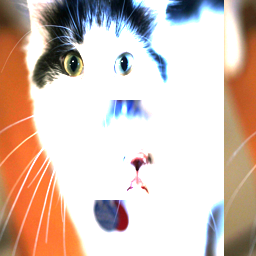

In [ ]:
im.point(lambda i: i * 3)

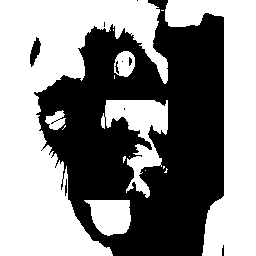

In [ ]:
t = im.convert('L')
t.point(lambda i: i < 128 and 255)  # Пороговое преобразование

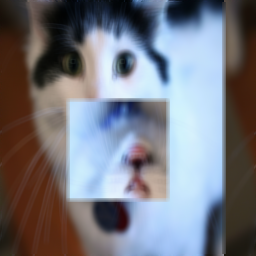

In [ ]:
from PIL import ImageFilter as ifilter


im.filter(ifilter.BLUR)

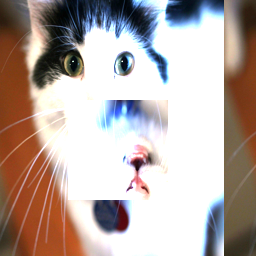

In [ ]:
from PIL import ImageEnhance as Ienh


enh = Ienh.Brightness(im)  # Sharpness, Filters и другие
enh.enhance(1.9)  # На 90% светлее

# Основы многопоточности. Библиотека asyncio

**Concurrency** — кооперативная многозадачность

**Parallelism** — вытесняющая многозадачность

Вытесняющая многозадачность заключается в одновременном выполнении нескольких операций. Многопроцессорность — это средство реализации вытесняющей многозадачности, которое влечет за собой распределение задач по центральным процессорам компьютера (ЦП или ядрам). Сюда же относится многопоточность (multithreading)

Многопоточность — это модель параллельного выполнения, при которой несколько потоков по очереди выполняют задачи. Один процесс может содержать несколько потоков. Python имеет сложные отношения с многопоточностью благодаря своему GIL, но это уже совсем другая история.

Кооперативная многозадачность — это несколько более широкий термин, чем вытесняющая многозадачность. Это предполагает, что несколько задач могут выполняться перекрывающимся образом.

Многопоточность лучше подходит для задач, связанных с вводом-выводом.

Стандартная библиотека Python реализует поддержку вытесняющей многозадачности через свои пакеты multiprocessing, threading и concurrent.futures. Это все уровень ОС, она решает когда у какого процесса или потока отобрать управление, а кому его передать.

Конкурентная многозадачность -- тип многозадачности, при котором следующая задача выполняется только после того, как текущая задача явно объявит себя готовой отдать процессорное время другим задачам. То есть обеспечивается асинхронное выполнение кода.

Асинхронные подпрограммы могут «приостанавливаться», ожидая конечного результата, и тем временем запускать другие подпрограммы.
Асинхронный код с помощью описанного выше механизма облегчает параллельное выполнение. Другими словами, асинхронный код создает впечатление параллелизма.

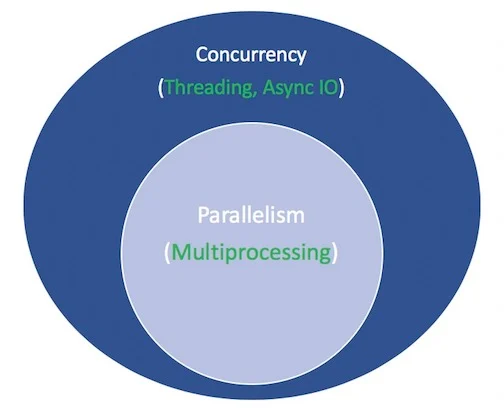

Корутина или сопрограмма — это вид асинхронного генератора

In [ ]:
!pip install nest_asyncio > /dev/null 2>&1

import time
import asyncio
import nest_asyncio  # Эта библиотека нужна только для colab.


nest_asyncio.apply()  # Этот вызов тоже.


async def count():
    print('One')
    await asyncio.sleep(1)
    print('Two')


async def main():
    await asyncio.gather(count(), count(), count())


if __name__ == '__main__':

    s = time.perf_counter()
    asyncio.run(main())
    elapsed = time.perf_counter() - s

    print(f'Executed in {elapsed:0.2f} seconds.')

One
One
One
Two
Two
Two
Executed in 1.01 seconds.


Сравним это с синхронной версией:

In [ ]:
import time


def count():
    print('One')
    time.sleep(1)
    print('Two')


def main():
    for _ in range(3):
        count()


if __name__ == '__main__':
    s = time.perf_counter()
    main()
    elapsed = time.perf_counter() - s
    print(f'Executed in {elapsed:0.2f} seconds.')

One
Two
One
Two
One
Two
Executed in 3.00 seconds.


**Правила асинхронного ввода-вывода**

*  Синтаксис `async def` вводит либо собственную сопрограмму, либо асинхронный генератор. Выражения `async with` и `async for` также допустимы.

*  Ключевое слово `await` передает управление функцией обратно в цикл обработки событий (event loop). Если Python встречает выражение `await f()` в области видимости `g(`), то ключевое слово `await` сообщает циклу обработки событий (event loop): «Приостановить выполнение `g()` до тех пор, пока не произойдет то, чего я жду (возврат результата `f()`), а пока пусть работает что-то еще, чтобы ресурсы зря не простаивали».

В коде этот второй пункт выглядит примерно так:

In [ ]:
async def g():
    # Сделать паузу здесь и вернуться к g(), когда будет готов результат f()
    r = await f()
    return r

Примеры правильного и неправильного синтаксиса

In [ ]:
async def f(x):
    y = await z(x)  # Правильно, `await` и `return` можноиспользовать в
                    # в корутинах (сопрограммах), как `yield`
    return y



async def g(x):
    yield x  # Правильно, здесь просто асинхронный генератор

async def m(x):
    yield from gen(x)  # Ошибка SyntaxError


def m(x):
    y = await z(x)  # Ошибка SyntaxError (нет указания `async def`)
    return y

In [ ]:
import asyncio
import random
import nest_asyncio  # Эта библиотека нужна только для colab.


nest_asyncio.apply()  # Этот вызов тоже.

# ANSI цвета для раскраски терминала
COLORS = (
    '\033[36m',  # голубой
    '\033[91m',  # красный
    '\033[32m',  # зеленый
)
ENDC = '\033[0m' # escape последовательность "сборосить цвет"

async def makerandom(idx: int, threshold: int = 6) -> int:
    color = COLORS[idx]
    print(f'{color}Запускаем генератор случайных чисел ({idx}).')

    i = random.randint(0, 10)
    while i < threshold:
        print(
            f'{color}Результат makerandom({idx}) == {i} '
            f'меньше порогового значения {threshold}; повтор.'
        )
        await asyncio.sleep(idx + 1)
        i = random.randint(0, 10)

    print(f'{color}---> Завершено выполнение makerandom({idx}) == {i}.{ENDC}')
    return i

async def main():
    res = await asyncio.gather(*(makerandom(i, 10 - i - 1) for i in range(3)))
    return res

if __name__ == '__main__':
    random.seed(555)
    r1, r2, r3 = asyncio.run(main())
    print(f'\nr1: {r1}, r2: {r2}, r3: {r3}')

Запускаем генератор случайных чисел (0).
Результат makerandom(0) == 3 меньше порогового значения 9; повтор.
Запускаем генератор случайных чисел (1).
Результат makerandom(1) == 4 меньше порогового значения 8; повтор.
Запускаем генератор случайных чисел (2).
Результат makerandom(2) == 2 меньше порогового значения 7; повтор.
Результат makerandom(0) == 2 меньше порогового значения 9; повтор.
Результат makerandom(0) == 8 меньше порогового значения 9; повтор.
Результат makerandom(1) == 1 меньше порогового значения 8; повтор.
Результат makerandom(0) == 2 меньше порогового значения 9; повтор.
Результат makerandom(2) == 4 меньше порогового значения 7; повтор.
Результат makerandom(0) == 6 меньше порогового значения 9; повтор.
Результат makerandom(1) == 3 меньше порогового значения 8; повтор.
Результат makerandom(0) == 8 меньше порогового значения 9; повтор.
Результат makerandom(2) == 4 меньше порогового значения 7; повтор.
---> Завершено выполнение makerandom(1) == 9.
Результат makerandom(0) == 

Продолжение здесь:https://realpython.com/async-io-python/

# Литература и дополнительные материалы

Итернет-ресурсы:

1.   [`github.com/vinta/awesome-python`](https://github.com/vinta/awesome-python)
2.   [`pythoncheatsheet.org`](https://pythoncheatsheet.org)
3.   [`realpython.com`](https://realpython.com)
4.   [`github.com/huangsam/ultimate-python` (примеры кода) ](https://github.com/huangsam/ultimate-python)
5.   [`geeksforgeeks.org/python-programming-language/`](https://geeksforgeeks.org/python-programming-language/)

Книги:

1.   [Марк Лутц. Изучаем Python, том 1. 5-е издание](https://disk.yandex.ru/i/sFJob6dKSLtINQ)
2.   [Марк Лутц. Изучаем Python, том 2. 5-е издание](https://disk.yandex.ru/i/wtmWm2W4uHHJOw)
3.   [Inside The Python Virtual Machine](https://disk.yandex.ru/i/SgodzyOGqhlT3Q)
4.   [Начинаем программировать на Python. 5-е издание](https://disk.yandex.ru/i/UEKyTqFJdSTpaw)
5.   [The Python 3 Standard Library by Example](https://disk.yandex.ru/i/-IlorRzgkjq18g)
6.   [MATH ADVENTURES WITH PYTHON](https://disk.yandex.ru/i/bv0D5cx_YW6AGA)
7.   [Python Tricks: The Book](https://disk.yandex.ru/i/sY9nHNOz6Gaypg)
8.   [Applying Math with Python](https://disk.yandex.ru/i/-I0eAZ3ciQOfpQ)
9.   [Глубокое обучение на Python](https://disk.yandex.ru/i/WDSgon8j87huOw)
10.  [Advanced Guide to Python 3 Programming](https://disk.yandex.ru/i/Gsj4sY6TQ3Li4A)
11.  [Practical Discrete Mathematics](https://disk.yandex.ru/i/3SESeK_My7PPng)

# Пример решения задачи 3

## Пример 1

In [ ]:
!pip install bitarray > /dev/null 2>&1

from math import sin, cos, pi
import bitarray as bitarray

IMG_WIDTH = 200
IMG_HEIGHT = 200

DELTA = 0.001  # In radians.
PERIOD = 2  # Times pi.
MARGIN = 8  # Pixels.

# Find next multiple of 32 that follows given IMG_WIDTH.
rounded_img_width = (IMG_WIDTH | 31) + 1

BITMAPFILEHEADER = (
    b'\x42\x4D'
    b'\x00\x00\x00\x00'
    b'\x00\x00'
    b'\x00\x00'
    b'\x3E\x00\x00\x00'
)

BITMAPINFOHEADER = (
    b'\x28\x00\x00\x00' +
    rounded_img_width.to_bytes(4, byteorder='little') +
    IMG_HEIGHT.to_bytes(4, byteorder='little') +
    b'\x01\x00'
    b'\x01\x00'
    b'\x00\x00\x00\x00'
    b'\x00\x00\x00\x00'
    b'\x00\x00\x00\x00'
    b'\x00\x00\x00\x00'
    b'\x00\x00\x00\x00'
    b'\x00\x00\x00\x00'
)

COLORTABLE = (
    b'\xFF\xFF\xFF\x00'
    b'\x00\x00\x00\x00'
)

calc_x = []
calc_y = []

t = 0
while t <= PERIOD * pi:
    calc_x += [-(16 * sin(t)**3)]
    calc_y += [-(13 * cos(t) - 5*cos(2*t) - 2*cos(3*t) - cos(4*t))]

    t += DELTA

# Fitting image to width and move it to the first quadrant.
min_x, max_x = min(calc_x), max(calc_x)
min_y, max_y = min(calc_y), max(calc_y)

scale_x = (rounded_img_width - 2*MARGIN) / (max_x - min_x)
scale_y = (IMG_HEIGHT - 2*MARGIN) / (max_y - min_y)

shift_x = round(scale_x * abs(min_x)) + MARGIN
shift_y = round(scale_y * abs(min_y)) + MARGIN

coords_x = [round(scale_x * x) + shift_x for x in calc_x]
coords_y = [round(scale_y * y) + shift_y for y in calc_y]

pixel_coords = list(zip(coords_x, coords_y))

# Create a flat array and fill it with pixel color data.
pixel_data = bitarray.bitarray(rounded_img_width * IMG_HEIGHT)
pixel_data.setall(0)

for (x, y) in pixel_coords:
    pixel_data[((y - 1) * rounded_img_width) + x] = 1

bmp = bitarray.bitarray()
bmp.frombytes(BITMAPFILEHEADER + BITMAPINFOHEADER + COLORTABLE)
bmp += pixel_data

with open('picture.bmp', 'wb') as fh:
    bmp.tofile(fh)


## Пример 2

`bmp.py`

In [ ]:
"""A module for dealing with BMP bitmap image files."""


def write_grayscale(filename, pixels):
    """Creates and writes a grayscale BMP file
    Args:
        filename: The name of the BMP file to be crated.
        pixels: A rectangular image stored as a sequence of rows.
            Each row must be an iterable series of integers in the range 0-255.
    Raises:
        OSError: If the file couldn't be written.
    """
    height = len(pixels)
    width = len(pixels[0])

    with open(filename, 'wb') as bmp:
        # BMP Header
        bmp.write(b'BM')

        size_bookmark = bmp.tell()  # The next four bytes hold the filesize as a 32-bit
        bmp.write(b'\x00\x00\x00\x00')  # little-endian integer. Zero placeholder for now.

        bmp.write(b'\x00\x00')  # Unused 16-bit integer - should be zero
        bmp.write(b'\x00\x00')  # Unused 16-bit integer - should be zero

        pixel_offset_bookmark = bmp.tell()  # The next four bytes hold the integer offset
        bmp.write(b'\x00\x00\x00\x00')  # to the pixel data. Zero placeholder for now.

        # Image header
        bmp.write(b'\x28\x00\x00\x00')  # Image header size in bytes - 40 decimal
        bmp.write(_int32_to_bytes(width))  # Image width in pixels
        bmp.write(_int32_to_bytes(height))  # Image height in pixels
        bmp.write(b'\x01\x00')  # Number of image planes
        bmp.write(b'\x08\x00')  # Bits per pixel 8 for grayscale
        bmp.write(b'\x00\x00\x00\x00')  # No compression
        bmp.write(b'\x00\x00\x00\x00')  # Zero for uncompressed images
        bmp.write(b'\x00\x00\x00\x00')  # Unused pixels per meter
        bmp.write(b'\x00\x00\x00\x00')  # Unused pixels per meter
        bmp.write(b'\x00\x00\x00\x00')  # Use whole color table
        bmp.write(b'\x00\x00\x00\x00')  # All colors are important

        # Color palette - a linear grayscale
        for c in range(256):
            bmp.write(bytes((c, c, c, 0)))

        # Pixel data
        pixel_data_bookmark = bmp.tell()
        for row in reversed(pixels):  # BMP files are bottom to top
            row_data = bytes(row)
            bmp.write(row_data)
            padding = b'\x00' * ((4 - (len(row) % 4)) % 4)  # Pad row to multiple of four bytes
            bmp.write(padding)

        # End of file
        eof_bookmark = bmp.tell()

        # Fill in file size placeholder
        bmp.seek(size_bookmark)
        bmp.write(_int32_to_bytes(eof_bookmark))

        # Fill in pixel
        bmp.seek(pixel_offset_bookmark)
        bmp.write(_int32_to_bytes(pixel_data_bookmark))


def _int32_to_bytes(i):
    """Convert an integer to four bytes in little-endian format."""
    return bytes((i & 0xff,
                  i >> 8 & 0xff,
                  i >> 16 & 0xff,
                  i >> 24 & 0xff))


def dimensions(filename):
    """Determine the dimensions in pixels of a BMP image.
    Args:
        filename: The filename of a BMP file.
    Returns:
        A tuple containing two integer with the width
        and height in pixels.
    Raises:
        ValueError: If the file was not aBMP file.
        OSError: If there was a problem reading the file.
    """
    with open(filename, 'rb') as f:
        magic = f.read(2)
        if magic != b'BM':
            raise ValueError("{} is not a BMP file".format(filename))

        f.seek(18)
        width_bytes = f.read(4)
        height_bytes = f.read(4)

        return (_bytes_to_int32(width_bytes),
                _bytes_to_int32(height_bytes))


def _bytes_to_int32(b):
    return b[0] | (b[1] << 8) | (b[2] << 16 | (b[3] << 24))

`my_func.py`

In [ ]:
"""Compouting Mandelbrot sets."""
import math


def drawing_my_func(size_y, size_x):
    """Создает монохромную матрицу для картинки.
    Параметры:
        size_x: Высота bmp картинки в пикселях
        size_y: ширина bmp картинки в пикселях
    Return:
        Список списков int в диапазоне 0-255 (0 - черный, 255 - белый).
    """
    data_matrix = [[0] * size_y for i in range(size_x)]
    minimum_size = min(size_y, size_x) - 1
    k = 10000   # коэффициент периода от 0 до 2*pi
    for i in range(int(2*math.pi * k)):
        data_matrix[int(int(minimum_size/2)*math.pow(math.sin(i/k), 3)) + int(size_x / 2)][int(int(minimum_size / 2) * math.pow(math.cos(i / k), 3)) + int(size_y / 2)] = 255
    return

`main.py`

In [ ]:
import bmp
import my_func
import sys


def main(width=1200, height=1200, name='draw.bmp'):
    """Создает bmp-рисунок функции x = 2*(sin(t))^3, y = 2*(cos(t))^3 при t [0, 2*pi]
    Параметры:
        width: Ширина bmp картинки в пикселях
        height: Высота bmp картинки в пикселях
    """
    pixels = my_func.drawing_my_func(width, height)
    bmp.write_grayscale(name, pixels)


if __name__ == "__main__":
    main(int(sys.argv[1]), int(sys.argv[2]), sys.argv[3])

In [ ]:

import requests
import matplotlib.pyplot as plt

# API-ключ для доступа к данным OpenWeatherMap
api_key = '94210884db92ab52ce306f0466046ebc'

# URL-адрес запроса на получение исторических данных о погоде в Приозерске
url = f'http://api.openweathermap.org/data/2.5/onecall/timemachine?lat=61.036&lon=30.1496&units=metric&appid={api_key}'

# Отправка GET-запроса к API и получение данных в формате JSON
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print('Ошибка при получении данных: ', response.status_code)
    exit()

# Вычисление средней температуры за каждый месяц
monthly_data = {}

for item in data['list']:
    timestamp = item['dt']
    date = pd.to_datetime(timestamp, unit='s')
    month = date.month

    if month not in monthly_data:
        monthly_data[month] = {'temp': [], 'count': 0}

    monthly_data[month]['temp'].append(item['main']['temp'])
    monthly_data[month]['count'] += 1

for month in monthly_data:
    monthly_data[month]['avg_temp'] = sum(monthly_data[month]['temp']) / monthly_data[month]['count']

# Построение графика средней температуры за год
plt.plot(range(1, 13), [monthly_data[month]['avg_temp'] for month in range(1, 13)])
plt.title('Средняя температура за год в Приозерске')
plt.xlabel('Месяц')
plt.ylabel('Средняя температура, °C')
plt.show()

Ошибка при получении данных:  401


NameError: ignored